## Datos para reporte anual de vivienda

El presente notebook se calcularán los datos necesarios para el reporte anual de vivienda. Los datos se obtendrán de la API del Sistema Nacional de Información e Indicadores de Vivienda (SNIIV) de la Secretaría de Desarrollo Agrario, Territorial y Urbano (SEDATU) así como del INEGI.

## Instalar paquetes 


In [1]:
!pip install geopandas
!pip install funciones
!pip install dataframe_image
!pip install pandas_pipe

In [2]:
import pandas as pd
import dataframe_image as dfi
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import locale
import geopandas as gpd
import funciones
import time
from pandas.api.types import CategoricalDtype
from matplotlib import ticker
from PIL import Image, ImageDraw
import calendar
import matplotlib.colors as mcolors
import seaborn as sns


In [3]:
#Evitar notación científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

##  1) Etorno Macroeconómico



#### Indicador Global de la Actividad Económica (IGAE)
- Gráfica 1. Variación anual del Indicador Global de la Actividad Económica (IGAE)

In [199]:
# URL con token del la variación anual del igae
url_igae = "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/737221/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"
url_igaec = "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/737256/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"

# Hacer la solicitud HTTP a la URL
response_indica = requests.get(url_igae)
response_indicac = requests.get(url_igaec)

# Convertir la respuesta en JSON
data_igae = response_indica.json()
data_igaec = response_indicac.json()

In [200]:
# Usar las columnas TIME_PERIOD y OBS_VALUE
df_igae = pd.DataFrame(data_igae["Series"][0]["OBSERVATIONS"])
df_igaec = pd.DataFrame(data_igaec["Series"][0]["OBSERVATIONS"])

In [202]:
#Convertir los tipos de datos de caracteres a fecha y numericas
df_igae['TIME_PERIOD'] = pd.to_datetime(df_igae['TIME_PERIOD'])
df_igae['OBS_VALUE'] = pd.to_numeric(df_igae['OBS_VALUE'])

df_igaec['TIME_PERIOD'] = pd.to_datetime(df_igaec['TIME_PERIOD'])
df_igaec['OBS_VALUE'] = pd.to_numeric(df_igaec['OBS_VALUE'])

# Obtener datos de las fechas requeridas 2023-01 a 2023-12
df_igae = df_igae.loc[(df_igae['TIME_PERIOD'] >= '2021-01') & (df_igae['TIME_PERIOD'] <= '2024-01')]
df_igaec = df_igaec.loc[(df_igaec['TIME_PERIOD'] >= '2021-01') & (df_igaec['TIME_PERIOD'] <= '2024-01')]

# Filtrar las columnas 'TIME_PERIOD' y 'OBS_VALUE' solamente
df_igae = df_igae[['TIME_PERIOD', 'OBS_VALUE']]
df_igaec = df_igaec[['TIME_PERIOD', 'OBS_VALUE']]


In [203]:
# Renombrar las columnas en los DataFrames
df_igae.rename(columns={'TIME_PERIOD': 'Fecha', 'OBS_VALUE': 'Total'}, inplace=True)
df_igaec.rename(columns={'OBS_VALUE': 'Construccion'}, inplace=True)

# Crear el DataFrame igae con las variables del DataFrame df_igae
igae = df_igae[['Fecha', 'Total']].copy()

# Agregar la variable de construcción desde el DataFrame df_igaec
igae['Construccion'] = df_igaec['Construccion']
igae

,Fecha,Total,Construccion
2,2023-12-01,2.10,15.31
3,2023-11-01,2.69,19.38
4,2023-10-01,3.49,27.11
5,2023-09-01,3.83,19.73
6,2023-08-01,3.58,29.16
7,2023-07-01,3.67,22.98
8,2023-06-01,4.04,21.16
9,2023-05-01,3.37,16.17
10,2023-04-01,2.79,4.03
11,2023-03-01,2.67,5.05


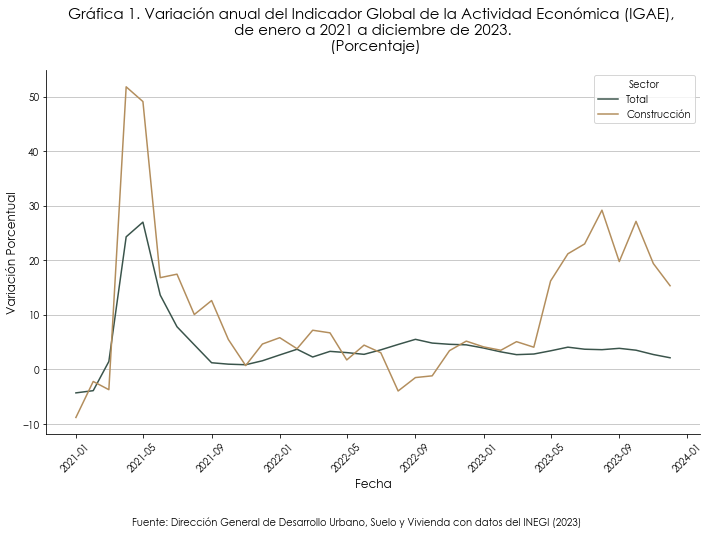

In [204]:
import matplotlib.pyplot as plt

# Fuente de los textos
fuente = "Century Gothic"

# Definición de la figura
fig, ax = plt.subplots(figsize=(10, 7))

# Graficar la variable 'Total'
plt.plot(igae['Fecha'], igae['Total'], color='#3a544b', label='Total')

# Graficar la variable 'Construccion'
plt.plot(igae['Fecha'], igae['Construccion'], color='#b38e5d', label='Construcción')

# Añadir título y etiquetas de ejes
plt.title('Gráfica 1. Variación anual del Indicador Global de la Actividad Económica (IGAE), \n de enero a 2021 a diciembre de 2023. \n (Porcentaje)', fontsize=15, loc='center', pad=20, fontname=fuente)
plt.xlabel('Fecha', fontsize=12, fontname=fuente)
plt.ylabel('Variación Porcentual', fontsize=12, fontname=fuente)

# Líneas horizontales en el gráfico
#ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#bdbdbd')

# Eliminar marco del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Añadir leyenda
plt.legend(title='Sector', fontsize=10)

# Añadir fuente
plt.figtext(0.5, -0.05, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del INEGI (2023)', ha='center', fontsize=10, fontname=fuente)

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, fontname=fuente)

# Mostrar la gráfica
plt.tight_layout()

# Guardar la gráfica como imagen
plt.savefig('grafica_igae.png', dpi=300)  # Se puede especificar el nombre y la resolución deseada
plt.show()


#### Inversión Fija Bruta (IFB)
- Gráfica 2. Variación anual de la Inversión Fija Bruta (IFB) de la construcción



In [206]:
# URL con token del ifb variación anual desestacionalizada
url_ifb =       "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/741160/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"
url_ifb_resi =  "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/741167/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"
url_ifb_nresi = "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/741174/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"

# Hacer la solicitud HTTP a la URL
response_ifb = requests.get(url_ifb)
response_ifb_resi = requests.get(url_ifb_resi)
response_ifb_nresi = requests.get(url_ifb_nresi)

# Convertir la respuesta en JSON
data_ifb = response_ifb.json()
data_ifb_resi = response_ifb_resi.json()
data_ifb_nresi = response_ifb_nresi.json()

In [207]:
# Crear dataframes de pandas a partir de los datos JSON
df_ifb = pd.DataFrame(data_ifb["Series"][0]["OBSERVATIONS"])
df_ifb_resi = pd.DataFrame(data_ifb_resi["Series"][0]["OBSERVATIONS"])
df_ifb_nresi = pd.DataFrame(data_ifb_nresi["Series"][0]["OBSERVATIONS"])

In [208]:
#Usar las columnas necesarias
df_ifb = df_ifb[['TIME_PERIOD', 'OBS_VALUE']]
df_ifb_resi = df_ifb_resi[['TIME_PERIOD', 'OBS_VALUE']]
df_ifb_nresi = df_ifb_nresi[['TIME_PERIOD', 'OBS_VALUE']]

In [209]:
#Convertir los tipos de datos
df_ifb['TIME_PERIOD'] = pd.to_datetime(df_ifb['TIME_PERIOD'])
df_ifb['OBS_VALUE'] = pd.to_numeric(df_ifb['OBS_VALUE'])

df_ifb_resi['TIME_PERIOD'] = pd.to_datetime(df_ifb_resi['TIME_PERIOD'])
df_ifb_resi['OBS_VALUE'] = pd.to_numeric(df_ifb_resi['OBS_VALUE'])

df_ifb_nresi['TIME_PERIOD'] = pd.to_datetime(df_ifb_nresi['TIME_PERIOD'])
df_ifb_nresi['OBS_VALUE'] = pd.to_numeric(df_ifb_nresi['OBS_VALUE'])

C:\Users\hp\AppData\Local\Temp\ipykernel_17732\172831823.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ifb['TIME_PERIOD'] = pd.to_datetime(df_ifb['TIME_PERIOD'])
C:\Users\hp\AppData\Local\Temp\ipykernel_17732\172831823.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ifb_resi['TIME_PERIOD'] = pd.to_datetime(df_ifb_resi['TIME_PERIOD'])
C:\Users\hp\AppData\Local\Temp\ipykernel_17732\172831823.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ifb_nresi['TIME_PERIOD'] = pd.to_datetime(df_ifb_nresi['TIME_PERIOD'])


In [210]:
#Obtener datos de las fechas requeridas 2023-12-01 a 2023-01-01
df_ifb = df_ifb.loc[(df_ifb['TIME_PERIOD'] >= '2021-01') & (df_ifb ['TIME_PERIOD'] <= '2023-12')]
df_ifb_resi  = df_ifb_resi .loc[(df_ifb_resi['TIME_PERIOD'] >= '2021-01') & (df_ifb_resi ['TIME_PERIOD'] <= '2023-12')]
df_ifb_nresi  = df_ifb_nresi .loc[(df_ifb_nresi['TIME_PERIOD'] >= '2021-01') & (df_ifb_nresi ['TIME_PERIOD'] <= '2023-12')]

In [211]:
# Renombrar las columnas en los DataFrames
df_ifb.rename(columns={'TIME_PERIOD': 'Fecha', 'OBS_VALUE': 'Construcción'}, inplace=True)
df_ifb_resi.rename(columns={'OBS_VALUE': 'Residencial'}, inplace=True)
df_ifb_nresi.rename(columns={'OBS_VALUE': 'No residencial'}, inplace=True)

# Copiar el dataframe df_ifb en el nuevo dataframe ifb
ifb = df_ifb[['Fecha', 'Construcción']].copy()

# Agregar las variables necesarias al nuevo dataframe
ifb['Residencial'] = df_ifb_resi['Residencial'].values
ifb['No residencial'] = df_ifb_nresi['No residencial'].values

ifb

,Fecha,Construcción,Residencial,No residencial
2,2023-12-01,22.13,0.66,40.07
3,2023-11-01,21.58,6.02,35.64
4,2023-10-01,31.22,19.32,42.92
5,2023-09-01,26.20,8.02,41.68
6,2023-08-01,39.40,0.51,77.72
7,2023-07-01,30.03,3.69,54.92
8,2023-06-01,31.53,1.00,57.63
9,2023-05-01,23.10,1.64,47.89
10,2023-04-01,7.72,-9.71,29.70
11,2023-03-01,7.04,-1.46,16.49


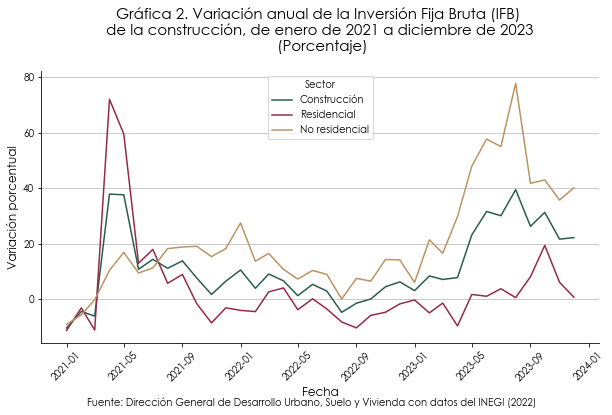

<Figure size 432x288 with 0 Axes>

In [363]:
# Fuente de los textos
plt.rcParams['font.family'] = 'Century Gothic'

# Definición de la figura
fig, ax = plt.subplots(figsize=(10, 5))

# Datos del DataFrame ifb
fechas = ifb['Fecha']
construccion = ifb['Construcción']
residencial = ifb['Residencial']
no_residencial = ifb['No residencial']

# Crear la gráfica
plt.plot(fechas, construccion, label='Construcción', color='#285c4d')
plt.plot(fechas, residencial, label='Residencial', color='#962945')
plt.plot(fechas, no_residencial, label='No residencial', color='#bb9361')

# Eliminar marco del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Líneas horizontales en el gráfico
ax.yaxis.grid(True, color='#bdbdbd')

# Título y etiquetas de los ejes
plt.title('Gráfica 2. Variación anual de la Inversión Fija Bruta (IFB) \n de la construcción, de enero de 2021 a diciembre de 2023 \n (Porcentaje)',  fontsize=15, loc='center', pad=20, fontname=fuente)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Variación porcentual', fontsize=12)

# Agregar la fuente al pie de la gráfica
plt.figtext(0.5, -0.05, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del INEGI (2022)', ha='center', fontsize=10)

# Mostrar la leyenda
plt.legend(title='Sector', fontsize=10)

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Líneas horizontales en el gráfico
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#bdbdbd')

# Guardar la gráfica como imagen
plt.savefig('grafica_ifb.png', dpi=500)  # Se puede especificar el nombre y la resolución deseada
plt.show()

# Mostrar la gráfica
plt.tight_layout()
plt.show()


#### Valor de la producción en la construcción
- Gráfica 3. Variación anual real del Valor de la producción de la industria de la construcción, de enero a 2023 a diciembre 2023 (porcentaje)

In [220]:

# URL con token del ifb variación anual desestacionalizada
url_co =  "  https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/720350/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json "
url_ed =  "  https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/720357/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"

# Hacer la solicitud HTTP a la URL
response_co = requests.get(url_co)
response_ed = requests.get(url_ed)

# Convertir la respuesta en JSON
data_co = response_co.json()
data_ed = response_ed.json()

In [221]:
# Crear dataframes de pandas a partir de los datos JSON
df_co = pd.DataFrame(data_co["Series"][0]["OBSERVATIONS"])
df_ed = pd.DataFrame(data_ed["Series"][0]["OBSERVATIONS"])

In [222]:
# Cambiar tipos de datos
df_co['TIME_PERIOD'] = pd.to_datetime(df_co['TIME_PERIOD'], format='%Y/%m')
df_co['OBS_VALUE'] = pd.to_numeric(df_co['OBS_VALUE'])

df_ed['TIME_PERIOD'] = pd.to_datetime(df_ed['TIME_PERIOD'], format='%Y/%m')
df_ed['OBS_VALUE'] = pd.to_numeric(df_ed['OBS_VALUE'])

In [223]:
#Obtener datos de las fechas requeridas 
df_co = df_co.loc[(df_co['TIME_PERIOD'] >= '2022-01') & (df_co ['TIME_PERIOD'] <= '2023-12')]
df_ed = df_ed.loc[(df_ed['TIME_PERIOD'] >= '2022-01') & (df_ed ['TIME_PERIOD'] <= '2023-12')]

In [224]:
#Usar las columnas necesarias
df_co = df_co[['TIME_PERIOD', 'OBS_VALUE']]
df_ed = df_ed[['TIME_PERIOD', 'OBS_VALUE']]

In [225]:
# Renombrar las columnas en los DataFrames
df_co.rename(columns={'TIME_PERIOD': 'Fecha', 'OBS_VALUE': 'Construcción'}, inplace=True)
df_ed.rename(columns={'TIME_PERIOD': 'Fecha', 'OBS_VALUE': 'Edificación'}, inplace=True)

In [226]:
# Añadir la columna de Edificación al DataFrame df_co
df_co['Edificación'] = df_ed['Edificación']
df_co = df_co.sort_values(by='Fecha')
df_co

,Fecha,Construcción,Edificación
25,2022-01-01,8.56,5.08
24,2022-02-01,5.15,10.70
23,2022-03-01,3.94,13.12
22,2022-04-01,3.55,10.00
21,2022-05-01,4.59,12.99
20,2022-06-01,8.12,15.02
19,2022-07-01,3.16,10.45
18,2022-08-01,-1.81,6.05
17,2022-09-01,0.05,6.64
16,2022-10-01,0.52,8.10


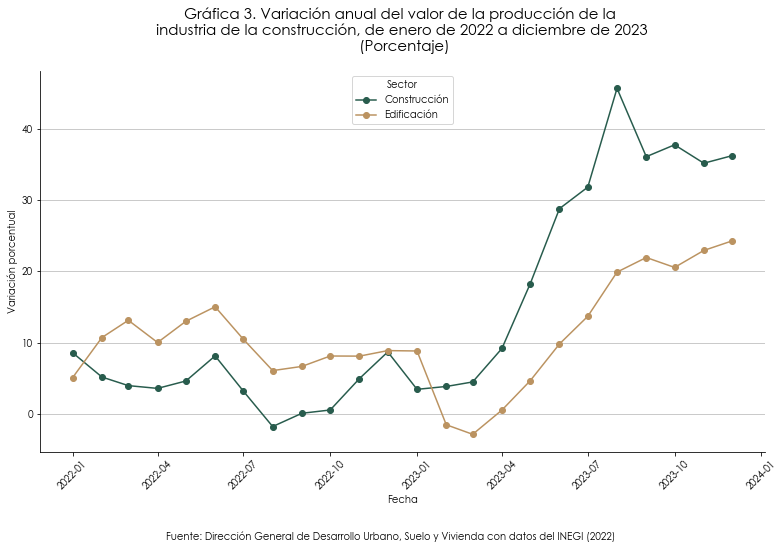

<Figure size 432x288 with 0 Axes>

In [362]:
# Fuente de los textos
plt.rcParams['font.family'] = 'Century Gothic'

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(13, 7))

# Graficar los datos
ax.plot(df_co['Fecha'], df_co['Construcción'], color='#285c4d', marker='o', linestyle='-', label='Construcción')
ax.plot(df_co['Fecha'], df_co['Edificación'], color='#bb9361', marker='o', linestyle='-',  label='Edificación')

# Configurar título y etiquetas de los ejes
ax.set_title('Gráfica 3. Variación anual del valor de la producción de la \n industria de la construcción, de enero de 2022 a diciembre de 2023 \n (Porcentaje)', fontsize=15, loc='center', pad=20)
ax.set_xlabel('Fecha')
ax.set_ylabel('Variación porcentual')

# Agregar la fuente al pie de la gráfica
plt.figtext(0.5, -0.05, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del INEGI (2022)', ha='center', fontsize=10)

# Mostrar la leyenda centrada
plt.legend(title='Sector', fontsize=10, loc='upper center')

# Líneas horizontales en el gráfico
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#bdbdbd')

# Rotar las etiquetas del eje x para mayor legibilidad
ax.tick_params(axis='x', rotation=45)

# Ocultar marco en el lado derecho y arriba
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Guardar la gráfica como imagen
plt.savefig('grafica_varpvi.png', dpi=500)  # Se puede especificar el nombre y la resolución deseada
plt.show()

# Mostrar la gráfica
plt.tight_layout()
plt.show()


- Gráfica 4. Variación anual de puestos de trabajo a enero 2023 a diciembre 2023 (porcentaje y variación absoluta)

In [169]:
# URL del archivo CSV
url_t = "https://raw.githubusercontent.com/Quetzaltlali/Indica_anual/main/imsss_1268_Puestostrabajo.csv"

# Leer el archivo CSV con el delimitador adecuado
df_t = pd.read_csv(url_t, delimiter=';')

# Eliminar la columna 'Unnamed: 2'
df_t.drop(columns=['Unnamed: 2'], inplace=True)

In [170]:
# Cambiar la columna "fecha" al tipo de dato de fecha
df_t['fecha'] = pd.to_datetime(df_t['fecha'])

C:\Users\hp\AppData\Local\Temp\ipykernel_17732\3123084769.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_t['fecha'] = pd.to_datetime(df_t['fecha'])


In [171]:
# Renombrar la columna "fecha" a "construcción"
df_t.rename(columns={'no_trabajos': 'trabajos totales'}, inplace=True)
df_t

,fecha,trabajos totales
0,2023-12-01,22024386
1,2023-11-01,22409268
2,2023-10-01,22302690
3,2023-09-01,22129433
4,2023-08-01,21996875
5,2023-07-01,21885139
6,2023-06-01,21887307
7,2023-05-01,21862909
8,2023-04-01,21820291
9,2023-03-01,21796280


In [172]:
# URL del archivo CSV
url_c = "https://raw.githubusercontent.com/Quetzaltlali/Indica_anual/main/imsss_451_Construcci%C3%B3n.csv"

# Leer el archivo CSV con el delimitador adecuado
df_c = pd.read_csv(url_c, delimiter=';')
df_c

# Eliminar la columna 
df_c.drop(columns=['no_trabajos'], inplace=True)

# Renombrar la columna "fecha" a "construcción"
df_c.rename(columns={'fecha': 'trabajos construcción'}, inplace=True)


In [173]:
# Crear un DataFrame con los datos de diciembre 2023 a enero 2023
df_c = pd.DataFrame({
  'trabajos construcción': [1816215, 1929454, 1930279, 1892773, 1882750, 1844064, 1825366, 1800953, 1771707, 1762109, 1745979, 1719840],
  'fecha': ['2023/Dec', '2023/Nov', '2023/Oct', '2023/Sep', '2023/Aug', '2023/Jul', '2023/Jun', '2023/May', '2023/Apr', '2023/Mar', '2023/Feb', '2023/Jan']
})

# Convertir la columna 'fecha' a tipo datetime
df_c['fecha'] = pd.to_datetime(df_c['fecha'])


C:\Users\hp\AppData\Local\Temp\ipykernel_17732\2186063550.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_c['fecha'] = pd.to_datetime(df_c['fecha'])


In [174]:
# Realizar la fusión de df_t y df_c en función de la columna 'fecha'
df_t = pd.merge(df_t, df_c[['fecha', 'trabajos construcción']], on='fecha', how='left')
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha                  13 non-null     datetime64[ns]
 1   trabajos totales       13 non-null     int64         
 2   trabajos construcción  13 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 444.0 bytes


In [175]:
df_t

,fecha,trabajos totales,trabajos construcción
0,2023-12-01,22024386,1816215
1,2023-11-01,22409268,1929454
2,2023-10-01,22302690,1930279
3,2023-09-01,22129433,1892773
4,2023-08-01,21996875,1882750
5,2023-07-01,21885139,1844064
6,2023-06-01,21887307,1825366
7,2023-05-01,21862909,1800953
8,2023-04-01,21820291,1771707
9,2023-03-01,21796280,1762109


In [176]:
# Calcular la variación absoluta mensual
df_t['variacion_absoluta'] = df_t['trabajos totales'] - df_t['trabajos construcción'].shift(1)

# Calcular la variación relativa mensual
df_t['variacion_relativa'] = (df_t['variacion_absoluta'] / df_t['trabajos totales'].shift(1)) * 100

# Mostrar el DataFrame con las columnas de variación absoluta y relativa
print(df_t[['fecha', 'variacion_absoluta', 'variacion_relativa']])

        fecha  variacion_absoluta  variacion_relativa
0  2023-12-01                 NaN                 NaN
1  2023-11-01         20593053.00               93.50
2  2023-10-01         20373236.00               90.91
3  2023-09-01         20199154.00               90.57
4  2023-08-01         20104102.00               90.85
5  2023-07-01         20002389.00               90.93
6  2023-06-01         20043243.00               91.58
7  2023-05-01         20037543.00               91.55
8  2023-04-01         20019338.00               91.57
9  2023-03-01         20024573.00               91.77
10 2023-02-01         19898360.00               91.29
11 2023-01-01         19738616.00               91.13
12 2023-01-01         19764755.00               92.00


In [177]:
df_t

,fecha,trabajos totales,trabajos construcción,variacion_absoluta,variacion_relativa
0,2023-12-01,22024386,1816215,NaN,NaN
1,2023-11-01,22409268,1929454,20593053.00,93.50
2,2023-10-01,22302690,1930279,20373236.00,90.91
3,2023-09-01,22129433,1892773,20199154.00,90.57
4,2023-08-01,21996875,1882750,20104102.00,90.85
5,2023-07-01,21885139,1844064,20002389.00,90.93
6,2023-06-01,21887307,1825366,20043243.00,91.58
7,2023-05-01,21862909,1800953,20037543.00,91.55
8,2023-04-01,21820291,1771707,20019338.00,91.57
9,2023-03-01,21796280,1762109,20024573.00,91.77


In [178]:
# Calcular el promedio de trabajos totales
promedio_trabajos_totales = df_t['trabajos totales'].mean()

# Mostrar el promedio
print("El promedio de trabajos totales es:", promedio_trabajos_totales)


El promedio de trabajos totales es: 21903402.846153848


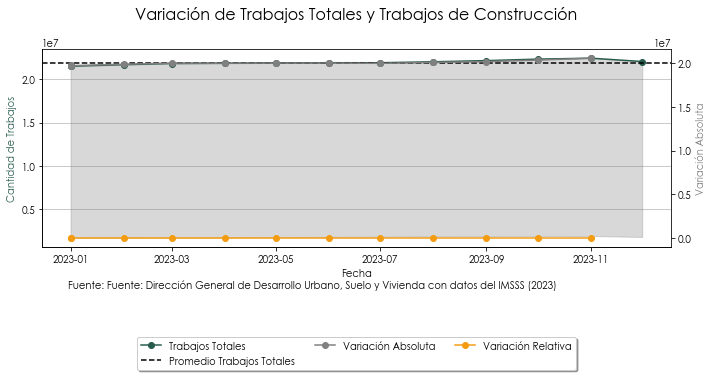

3

In [186]:
import matplotlib.pyplot as plt

# Fuente de los textos
plt.rcParams['font.family'] = 'Century Gothic'

# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(10, 4))

# Graficar los datos de trabajos totales y trabajos de construcción
ax1.plot(df_t['fecha'], df_t['trabajos totales'], color='#285c4d', marker='o', linestyle='-', label='Trabajos Totales')

# Configurar el primer eje y (izquierdo)
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Cantidad de Trabajos', color='#285c4d')

# Rellenar el área debajo de la línea de variación absoluta
ax1.fill_between(df_t['fecha'], df_t['trabajos construcción'], df_t['trabajos totales'], color='gray', alpha=0.3)

# Agregar la variación absoluta al segundo eje y (derecho)
ax2 = ax1.twinx()
ax2.plot(df_t['fecha'], df_t['variacion_absoluta'], color='gray', marker='o', linestyle='-', label='Variación Absoluta')

# Configurar el segundo eje y (derecho)
ax2.set_ylabel('Variación Absoluta', color='gray')

# Agregar la variación relativa al segundo eje y (derecho)
ax2.plot(df_t['fecha'], df_t['variacion_relativa'], color='#f39c12', marker='o', linestyle='-', label='Variación Relativa')

# Configurar la línea punteada para el promedio de trabajos totales
promedio_trabajos_totales = 21903402.846153848
ax1.axhline(y=promedio_trabajos_totales, color='black', linestyle='--', label='Promedio Trabajos Totales')

# Mostrar la leyenda centrada
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3)

# Líneas horizontales en el gráfico
ax1.set_axisbelow(True)
ax1.yaxis.grid(True, color='#bdbdbd')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Ocultar marcos en el lado derecho y arriba
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Agregar la fuente y título
plt.figtext(0.1, 0.002, 'Fuente: Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del IMSSS (2023)', ha='left', fontsize=10)
plt.suptitle('Variación de Trabajos Totales y Trabajos de Construcción', fontsize=16)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


3

- Gráfica 5. Horas trabajadas del personal ocupado del sector de la construcción 2023

In [235]:
# URL con token inegi
url_pot = "    https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/720462/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"
url_rat =  "   https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/720469/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json "

# Hacer la solicitud HTTP a la URL
response_pot = requests.get(url_pot)
response_rat = requests.get(url_rat)

# Convertir la respuesta en JSON
data_persocu_tot = response_pot.json()
data_persocu_rat = response_rat.json()


In [236]:
# Crear dataframes de pandas a partir de los datos JSON
data_persocu_tot = pd.DataFrame(data_co["Series"][0]["OBSERVATIONS"])
data_persocu_rat = pd.DataFrame(data_ed["Series"][0]["OBSERVATIONS"])

In [237]:
# Cambiar tipos de datos
data_persocu_tot['TIME_PERIOD'] = pd.to_datetime(data_persocu_tot['TIME_PERIOD'], format='%Y/%m')
data_persocu_tot['OBS_VALUE'] = pd.to_numeric(data_persocu_tot['OBS_VALUE'])

data_persocu_rat['TIME_PERIOD'] = pd.to_datetime(data_persocu_rat['TIME_PERIOD'], format='%Y/%m')
data_persocu_rat['OBS_VALUE'] = pd.to_numeric(data_persocu_rat['OBS_VALUE'])

In [238]:
#Obtener datos de las fechas requeridas 
data_persocu_tot = data_persocu_tot.loc[(data_persocu_tot['TIME_PERIOD'] >= '2022-01') & (data_persocu_tot ['TIME_PERIOD'] <= '2023-12')]
data_persocu_rat = data_persocu_rat.loc[(data_persocu_rat['TIME_PERIOD'] >= '2022-01') & (data_persocu_rat ['TIME_PERIOD'] <= '2023-12')]

#Usar las columnas necesarias
data_persocu_tot = data_persocu_tot[['TIME_PERIOD', 'OBS_VALUE']]
data_persocu_rat = data_persocu_rat[['TIME_PERIOD', 'OBS_VALUE']]

# Renombrar las columnas en los DataFrames
data_persocu_tot.rename(columns={'TIME_PERIOD': 'Fecha', 'OBS_VALUE': 'Personal ocupado total'}, inplace=True)
data_persocu_rat.rename(columns={'TIME_PERIOD': 'Fecha', 'OBS_VALUE': 'Personal dependiente de la razón social total'}, inplace=True)

# Añadir la columna de Edificación al DataFrame data_persocu_tot
data_persocu_tot['Personal dependiente de la razón social total'] = data_persocu_rat['Personal dependiente de la razón social total']
data_persocu_tot = data_persocu_tot.sort_values(by='Fecha')
data_persocu_tot

,Fecha,Personal ocupado total,Personal dependiente de la razón social total
25,2022-01-01,8.56,5.08
24,2022-02-01,5.15,10.70
23,2022-03-01,3.94,13.12
22,2022-04-01,3.55,10.00
21,2022-05-01,4.59,12.99
20,2022-06-01,8.12,15.02
19,2022-07-01,3.16,10.45
18,2022-08-01,-1.81,6.05
17,2022-09-01,0.05,6.64
16,2022-10-01,0.52,8.10


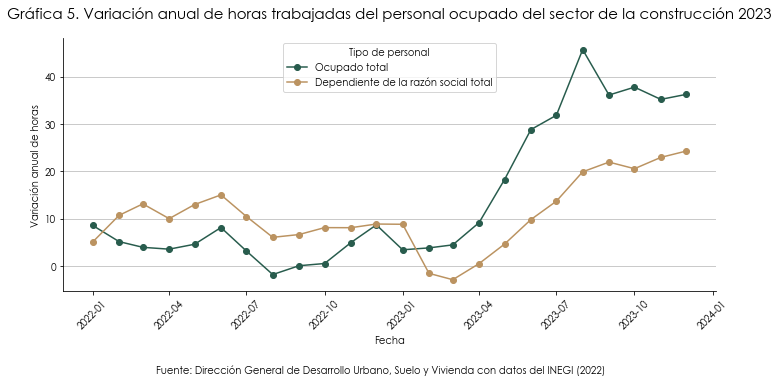

In [239]:
# Fuente de los textos
plt.rcParams['font.family'] = 'Century Gothic'

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 5))

# Graficar los datos
ax.plot(data_persocu_tot['Fecha'], data_persocu_tot['Personal ocupado total'], color='#285c4d', marker='o', linestyle='-', label='Ocupado total')
ax.plot(data_persocu_tot['Fecha'], data_persocu_tot['Personal dependiente de la razón social total'], color='#bb9361', marker='o', linestyle='-',  label='Dependiente de la razón social total')

# Configurar título y etiquetas de los ejes
ax.set_title('Gráfica 5. Variación anual de horas trabajadas del personal ocupado del sector de la construcción 2023', fontsize=15, loc='center', pad=20)
ax.set_xlabel('Fecha')
ax.set_ylabel('Variación anual de horas')

# Agregar la fuente al pie de la gráfica
plt.figtext(0.5, -0.05, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del INEGI (2022)', ha='center', fontsize=10)

# Mostrar la leyenda centrada
plt.legend(title='Tipo de personal', fontsize=10, loc='upper center')

# Líneas horizontales en el gráfico
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#bdbdbd')

# Rotar las etiquetas del eje x para mayor legibilidad
ax.tick_params(axis='x', rotation=45)

# Ocultar marco en el lado derecho y arriba
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


## FINANCIAMIENTOS PARA VIVIENDA	

- Gráfica 6. Total de financiamientos para vivienda, por organismo otorgante enero a diciembre 2023, según organismo otorgante (porcentaje de acciones)

In [4]:
#Url
url="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2023/0/0/organismo,modalidad,tipo_credito,destino_credito,anio,mes,sexo,grupo_edad"
r=requests.get(url)
print(r.status_code)

200


In [5]:
df=pd.DataFrame(r.json())
df.head()

,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
0,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,5,300939.02
1,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,26278.51
2,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,199788.64
3,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,2,512147.18
4,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,55018.64


In [6]:
print("Destino de crédito: ",df["destino_credito"].unique())
print("Organismo: ",df["organismo"].unique())
print("Meses disponibles ",df["mes"].unique())

Destino de crédito:  ['Vivienda nueva' 'Con disponibilidad de terreno' 'Vivienda existente'
 'Mejoramientos' 'Ampliación' 'Pago de pasivos' 'Autoproducción'
 'Adquisición de suelo' 'En arrendamiento' 'Reconstrucción'
 'Regularización de asentamientos' 'Insumos para vivienda' 'Liquidez']
Organismo:  ['FOVISSSTE' 'INFONAVIT' 'CONAVI' 'SHF (FONDEO)' 'INSUS' 'HABITAT MEXICO'
 'BANJERCITO' 'BANCA (CNBV)' 'INVI']
Meses disponibles  ['enero' 'febrero' 'marzo' 'abril' 'mayo' 'junio' 'julio' 'agosto'
 'septiembre' 'octubre' 'noviembre' 'diciembre']


In [7]:
#Filtrar solo para invi
invi=df[df["organismo"].isin(["INVI"])]
print("Meses disponibles INVI",invi["mes"].unique())
invi.head()

Meses disponibles INVI ['enero' 'febrero']


,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
61983,2023,enero,INVI,Viviendas existentes,Credito individual,En arrendamiento,Urbano,11,16500.00
61984,2023,enero,INVI,Viviendas existentes,Credito individual,En arrendamiento,Urbano,80,241000.00
61985,2023,enero,INVI,Viviendas existentes,Credito individual,En arrendamiento,Urbano,10,23000.00
61986,2023,enero,INVI,Viviendas existentes,Credito individual,En arrendamiento,Urbano,107,160500.00
61987,2023,enero,INVI,Viviendas existentes,Credito individual,En arrendamiento,Urbano,77,245000.00


In [8]:
#Filtrar solo para insus
insus=df[df["organismo"].isin(["INSUS"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
insus=insus[(insus["año"] == 2023) & (insus["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]
print("Meses disponibles insus",insus["mes"].unique())
insus.head()

Meses disponibles insus ['enero' 'febrero' 'marzo' 'abril' 'mayo' 'junio' 'julio' 'agosto'
 'septiembre' 'octubre' 'noviembre' 'diciembre']


,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
40136,2023,enero,INSUS,Otros programas,Credito individual,Regularización de asentamientos,Urbano,9,121500.00
40137,2023,enero,INSUS,Otros programas,Credito individual,Regularización de asentamientos,Urbano,14,189000.00
40138,2023,enero,INSUS,Otros programas,Credito individual,Regularización de asentamientos,Mixto,74,999000.00
40139,2023,febrero,INSUS,Otros programas,Credito individual,Regularización de asentamientos,Urbano,14,189000.00
40140,2023,febrero,INSUS,Otros programas,Credito individual,Regularización de asentamientos,Urbano,9,121500.00


In [9]:
#Filtrar solo para conavi
conavi=df[df["organismo"].isin(["CONAVI"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
conavi=conavi[(conavi["año"] == 2023) & (conavi["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]
print("Meses disponibles conavi",conavi["mes"].unique())
conavi.head()

Meses disponibles conavi ['febrero' 'abril' 'mayo' 'junio' 'julio' 'agosto' 'septiembre' 'octubre'
 'noviembre' 'diciembre' 'enero' 'marzo']


,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
33935,2023,febrero,CONAVI,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,220000.00
33936,2023,febrero,CONAVI,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,2,670000.00
33937,2023,febrero,CONAVI,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,2,670000.00
33938,2023,febrero,CONAVI,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Rural,55,54426307.85
33939,2023,febrero,CONAVI,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Rural,1,419440.00


In [10]:
#Filtrar solo para shf
shf=df[df["organismo"].isin(["SHF (FONDEO)"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
shf=shf[(shf["año"] == 2023) & (shf["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]
print("Meses disponibles SHF",shf["mes"].unique())
shf.head()

Meses disponibles SHF ['enero' 'febrero' 'marzo' 'abril' 'mayo' 'junio' 'julio' 'agosto'
 'septiembre' 'octubre' 'noviembre' 'diciembre']


,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
35196,2023,enero,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,No distribuido,0,0.00
35197,2023,enero,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,No distribuido,0,1158580.13
35198,2023,enero,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,Urbano,12,0.00
35199,2023,enero,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,Rural,10,0.00
35200,2023,enero,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,Mixto,1,0.00


In [11]:
#Filtrar solo para infonavit
infonavit=df[df["organismo"].isin(["INFONAVIT"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
infonavit=infonavit[(infonavit["año"] == 2023) & (infonavit["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]
print("Meses disponibles Infonavit",infonavit["mes"].unique())
infonavit.head()

Meses disponibles Infonavit ['enero' 'febrero' 'marzo' 'abril' 'mayo' 'junio' 'julio' 'agosto'
 'septiembre' 'octubre' 'noviembre' 'diciembre']


,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
8590,2023,enero,INFONAVIT,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,75,47734249.12
8591,2023,enero,INFONAVIT,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Mixto,12,6679074.79
8592,2023,enero,INFONAVIT,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Mixto,6,5494662.90
8593,2023,enero,INFONAVIT,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,3,0.00
8594,2023,enero,INFONAVIT,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,44,35484928.64


In [12]:
#Filtrar solo para habitat_mexico
habitat_mexico=df[df["organismo"].isin(["HABITAT MEXICO"])]
    
# Filtrar el período de enero de 2023 a diciembre de 2023
habitat_mexico=habitat_mexico[(habitat_mexico["año"] == 2023) & (habitat_mexico["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]
print("Meses disponibles habitat_mexico",habitat_mexico["mes"].unique())
habitat_mexico.head()

Meses disponibles habitat_mexico ['agosto' 'septiembre' 'octubre' 'noviembre' 'diciembre' 'abril' 'mayo'
 'junio' 'julio']


,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
40558,2023,agosto,HABITAT MEXICO,Viviendas nuevas,Credito individual,Autoproducción,Semiurbano,20,4467442.60
40559,2023,septiembre,HABITAT MEXICO,Viviendas nuevas,Credito individual,Autoproducción,Rural,1,47000.00
40560,2023,septiembre,HABITAT MEXICO,Viviendas nuevas,Credito individual,Autoproducción,Urbano,1,47000.00
40561,2023,septiembre,HABITAT MEXICO,Viviendas nuevas,Credito individual,Autoproducción,Rural,14,658000.00
40562,2023,septiembre,HABITAT MEXICO,Viviendas nuevas,Credito individual,Autoproducción,Semiurbano,93,3804000.00


In [13]:
#Filtrar solo para fovissste
fovissste=df[df["organismo"].isin(["FOVISSSTE"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
fovissste=fovissste[(fovissste["año"] == 2023) & (fovissste["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]
fovissste.head()

,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
0,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,5,300939.02
1,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,26278.51
2,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,199788.64
3,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,2,512147.18
4,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,55018.64


In [14]:
#Filtrar solo para cnbv
cnbv=df[df["organismo"].isin(["BANCA (CNBV)"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
cnbv=cnbv[(cnbv["año"] == 2023) & (cnbv["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]
cnbv.head()

,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
41137,2023,enero,BANCA (CNBV),Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,11,10462757.00
41138,2023,enero,BANCA (CNBV),Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Mixto,8,12323817.00
41139,2023,enero,BANCA (CNBV),Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,1919241.00
41140,2023,enero,BANCA (CNBV),Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,4,8615510.00
41141,2023,enero,BANCA (CNBV),Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,513261.00


In [15]:
#Filtrar solo para banjercito
banjercito=df[df["organismo"].isin(["BANJERCITO"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
banjercito=banjercito[(banjercito["año"] == 2023) & (banjercito["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]
banjercito.head()

,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
40641,2023,abril,BANJERCITO,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,1511767.37
40642,2023,abril,BANJERCITO,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,1241000.00
40643,2023,abril,BANJERCITO,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,683538.03
40644,2023,abril,BANJERCITO,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,1400000.00
40645,2023,abril,BANJERCITO,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Semiurbano,1,515000.00


In [16]:
# Crear un df para pegar los resultados generales
organismos=pd.concat([shf,infonavit,habitat_mexico,fovissste,cnbv,banjercito,conavi,insus,invi])
print("El total de financiamientos es "+str(organismos["acciones"].sum())+" financiamientos equivalentes a "+str(organismos["monto"].sum())+" pesos")
organismos.groupby(["organismo"]).agg({"acciones":"sum","monto":"sum"}) 

El total de financiamientos es 762818 financiamientos equivalentes a 520840268742.98444 pesos


,acciones,monto
organismo,,
BANCA (CNBV),170606,276849450147.00
BANJERCITO,560,696030802.18
CONAVI,70540,5592141783.95
FOVISSSTE,36684,30567157562.18
HABITAT MEXICO,905,52354598.39
INFONAVIT,434029,202730797432.55
INSUS,5379,72596257.51
INVI,4998,11259500.00
SHF (FONDEO),39117,4268480659.22


In [17]:
# Calcular el total general de acciones y montos
total_general_acciones = organismos["acciones"].sum()
total_general_monto = organismos["monto"].sum()

In [18]:
total_general_acciones

762818

In [19]:
# Calcular el total de acciones y montos por organismo
total_por_organismo = organismos.groupby(["organismo"]).agg({"acciones": "sum", "monto": "sum"})

# Calcular el total general de acciones y montos
total_general_acciones = organismos["acciones"].sum()
total_general_monto = organismos["monto"].sum()

# Calcular el porcentaje sobre el total general por organismo
total_por_organismo["porcentaje_acciones"] = total_por_organismo["acciones"] / total_general_acciones * 100

# Imprimir el DataFrame con el total y el porcentaje
print(total_por_organismo)
print("\nTotal general de acciones:", total_general_acciones)
print("Total general de monto:", total_general_monto)

                acciones           monto  porcentaje_acciones
organismo                                                    
BANCA (CNBV)      170606 276849450147.00                22.37
BANJERCITO           560    696030802.18                 0.07
CONAVI             70540   5592141783.95                 9.25
FOVISSSTE          36684  30567157562.18                 4.81
HABITAT MEXICO       905     52354598.39                 0.12
INFONAVIT         434029 202730797432.55                56.90
INSUS               5379     72596257.51                 0.71
INVI                4998     11259500.00                 0.66
SHF (FONDEO)       39117   4268480659.22                 5.13

Total general de acciones: 762818
Total general de monto: 520840268742.98444


In [20]:
total_por_organismo

,acciones,monto,porcentaje_acciones
organismo,,,
BANCA (CNBV),170606,276849450147.00,22.37
BANJERCITO,560,696030802.18,0.07
CONAVI,70540,5592141783.95,9.25
FOVISSSTE,36684,30567157562.18,4.81
HABITAT MEXICO,905,52354598.39,0.12
INFONAVIT,434029,202730797432.55,56.90
INSUS,5379,72596257.51,0.71
INVI,4998,11259500.00,0.66
SHF (FONDEO),39117,4268480659.22,5.13


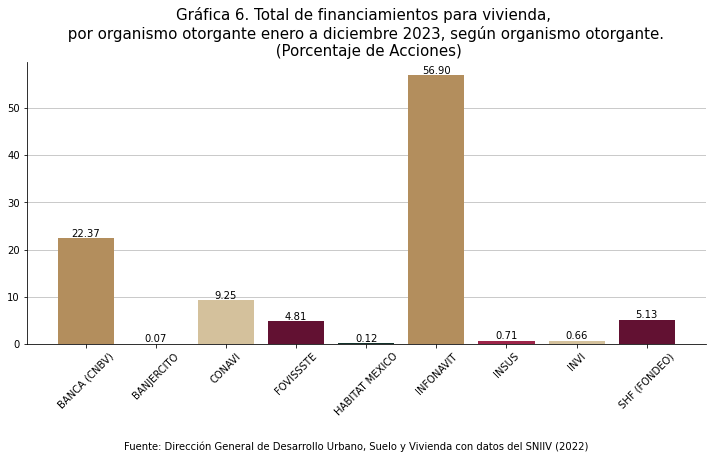

In [21]:
import matplotlib.pyplot as plt

# Definir colores personalizados
colores = ['#b38e5d', '#9d2449', '#d4c19c', '#621132', '#13322b']

# Crear gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las barras
bars = ax.bar(total_por_organismo.index, total_por_organismo["porcentaje_acciones"], color=colores)

# Añadir título
plt.title('Gráfica 6. Total de financiamientos para vivienda, \n por organismo otorgante enero a diciembre 2023, según organismo otorgante. \n (Porcentaje de Acciones)', fontsize=15, loc='center')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Líneas horizontales en el gráfico
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#bdbdbd')

# Ocultar marco en el lado derecho y arriba
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Añadir fuente
plt.figtext(0.5, -0.05, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2022)' , ha='center', fontsize=10)

# Etiquetas para las barras con dos decimales
for bar in bars:
    # Obtenemos la altura para las anotaciones.
    bar_value = bar.get_height()
    # Formato de números con dos decimales.
    text = f'{bar_value:.2f}'
    # Centrar etiquetas de x-axis.
    text_x = bar.get_x() + bar.get_width() / 2
    # get_y() lugar donde empieza la barra y añadimos la altura.
    text_y = bar.get_y() + bar_value
    # Ubicación de las etiquetas de datos de las barras y color
    ax.text(text_x, text_y, text, ha='center', va='bottom', color="black", fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

- Gráfica 7. Financiamientos de vivienda, por organismo otorgante y modalidad enero a diciembre a 2023 (porcentaje de acciones)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62017 entries, 0 to 62016
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   año              62017 non-null  int64  
 1   mes              62017 non-null  object 
 2   organismo        62017 non-null  object 
 3   modalidad        62017 non-null  object 
 4   tipo_credito     62017 non-null  object 
 5   destino_credito  62017 non-null  object 
 6   zona             62017 non-null  object 
 7   acciones         62017 non-null  int64  
 8   monto            62017 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 4.3+ MB


In [23]:
def calcular_porcentaje_destino_credito(df, organismo):
    # Filtrar el DataFrame por el organismo dado
    organismo_df = df[df["organismo"] == organismo]
    
    # Filtrar el período de enero a noviembre de 2023
    organismo_df = organismo_df[(organismo_df["año"] == 2023) & (organismo_df["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]

    # Calcular el total de acciones
    total_acciones = organismo_df["acciones"].sum()

    # Calcular el porcentaje de destino_credito según el número de acciones
    porcentaje_destino_credito = organismo_df.groupby("destino_credito")["acciones"].sum() / total_acciones * 100
    
    return porcentaje_destino_credito

# Lista de organismos
organismos = df["organismo"].unique()
organismos

# Iterar sobre cada organismo y calcular el porcentaje de destino de crédito
for organismo in organismos:
    porcentaje = calcular_porcentaje_destino_credito(df, organismo)
    print("Organismo:", organismo)
    print(porcentaje)
    print("\n")

Organismo: FOVISSSTE
destino_credito
Ampliación                       0.02
Con disponibilidad de terreno    0.87
Mejoramientos                    0.02
Pago de pasivos                  0.10
Vivienda existente              52.73
Vivienda nueva                  46.24
Name: acciones, dtype: float64


Organismo: INFONAVIT
destino_credito
Adquisición de suelo             0.74
Autoproducción                   0.18
Con disponibilidad de terreno    2.21
Mejoramientos                   28.15
Pago de pasivos                  0.11
Vivienda existente              33.68
Vivienda nueva                  34.93
Name: acciones, dtype: float64


Organismo: CONAVI
destino_credito
Ampliación            2.47
Autoproducción        0.22
En arrendamiento      1.35
Mejoramientos        81.70
Reconstrucción        7.62
Vivienda existente    0.00
Vivienda nueva        6.63
Name: acciones, dtype: float64


Organismo: SHF (FONDEO)
destino_credito
Mejoramientos   100.00
Name: acciones, dtype: float64


Organismo: INS

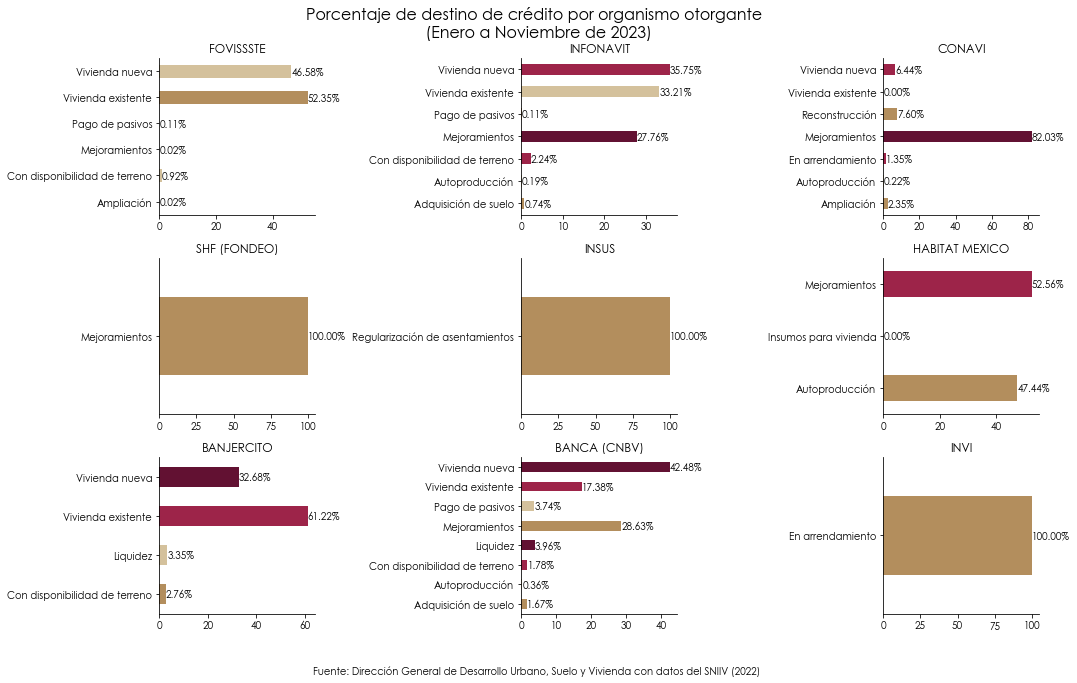

In [46]:
# Colores personalizados
colores = ['#b38e5d', '#d4c19c', '#9d2449', '#621132']

# Definir una función para calcular el porcentaje de destino de crédito para un organismo dado
def calcular_porcentaje_destino_credito(df, organismo):
    organismo_df = df[df["organismo"] == organismo]
    organismo_df = organismo_df[(organismo_df["año"] == 2023) & (organismo_df["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre"]))]
    total_acciones = organismo_df["acciones"].sum()
    porcentaje_destino_credito = organismo_df.groupby("destino_credito")["acciones"].sum() / total_acciones * 100
    return porcentaje_destino_credito

# Lista de organismos
organismos = ['FOVISSSTE', 'INFONAVIT', 'CONAVI', 'SHF (FONDEO)', 'INSUS', 'HABITAT MEXICO', 'BANJERCITO', 'BANCA (CNBV)', 'INVI']

# Crear gráficos de barras horizontales en una sola imagen
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 9))
fig.suptitle('Porcentaje de destino de crédito por organismo otorgante \n (Enero a Noviembre de 2023)', fontsize=16)

# Iterar sobre cada organismo y crear gráficos de barras horizontales
for idx, organismo in enumerate(organismos):
    porcentajes = calcular_porcentaje_destino_credito(df, organismo)
    ax = axs[idx // 3][idx % 3]
    porcentajes.plot(kind="barh", ax=ax, color=colores)
    ax.set_title(organismo)
    ax.set_ylabel(None)
    
    # Ajustes en los contornos
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    
    # Etiquetas en las barras con dos decimales
    for bar in ax.patches:
        bar_value = bar.get_width()
        text = f'{bar_value:.2f}%'
        text_x = bar.get_width()
        text_y = bar.get_y() + bar.get_height() / 2
        ax.text(text_x, text_y, text, ha='left', va='center', color="black", fontsize=10)

# Añadir fuente
plt.figtext(0.5, -0.05, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2022)' , ha='center', fontsize=10)

# Ajuste de espaciado
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Mostrar la gráfica
plt.show()


- Gráfica 8. Financiamientos promedio para vivienda, por organismo otorgante enero a diciembre a 2023, según organismo otorgante

In [47]:
# Obtener los datos del INPC desde la API del INEGI
url_inegi = "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/628194/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf/?type=json"
response = requests.get(url_inegi)
inpc_data = response.json()

# Crear DataFrame con los datos
inpc = pd.DataFrame(inpc_data["Series"][0]["OBSERVATIONS"])

# Convertir tipos de datos a fecha y numéricos
inpc['TIME_PERIOD'] = pd.to_datetime(inpc['TIME_PERIOD'], format='%Y/%m')

# Obtener datos de las fechas requeridas (2023-01 a 2023-12)
inpc = inpc.loc[(inpc['TIME_PERIOD'] >= '2023-01') & (inpc['TIME_PERIOD'] <= '2023-12')]

# Filtrar las columnas 'TIME_PERIOD' y 'OBS_VALUE' solamente
inpc = inpc[['TIME_PERIOD', 'OBS_VALUE']]

# Renombrar las columnas en los DataFrames
inpc.rename(columns={'TIME_PERIOD': 'Fecha', 'OBS_VALUE': 'Inpc'}, inplace=True)

# Ordenar por fecha
inpc.sort_values(by='Fecha', inplace=True)

# Reiniciar el índice después de la clasificación
inpc.reset_index(drop=True, inplace=True)
inpc

,Fecha,Inpc
0,2023-01-01,127.336
1,2023-02-01,128.046
2,2023-03-01,128.389
3,2023-04-01,128.363
4,2023-05-01,128.084
5,2023-06-01,128.214
6,2023-07-01,128.832
7,2023-08-01,129.545
8,2023-09-01,130.12
9,2023-10-01,130.609


In [48]:
# Listas
lista = df['organismo'].unique()
print(lista) 
mes = df['mes'].unique()
print(mes)
# Definir el orden de los meses
meses_ordenados = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']

['FOVISSSTE' 'INFONAVIT' 'CONAVI' 'SHF (FONDEO)' 'INSUS' 'HABITAT MEXICO'
 'BANJERCITO' 'BANCA (CNBV)' 'INVI']
['enero' 'febrero' 'marzo' 'abril' 'mayo' 'junio' 'julio' 'agosto'
 'septiembre' 'octubre' 'noviembre' 'diciembre']


In [49]:
# Definir la función actualiza_precios
def actualiza_precios(df, inpc):
    # Agrupar por organismo, mes y año y calcular sumas
    df = df.groupby(['organismo', 'año', 'mes']).agg({'acciones':'sum', 'monto':'sum'}).reset_index()
    # Ordenar los meses
    df['mes'] = pd.Categorical(df['mes'], categories=meses_ordenados, ordered=True)
    df = df.sort_values(['organismo', 'año', 'mes'])
    # Pegar con tabla de INPC
    df = pd.merge(df, inpc, left_on='año', right_on='fecha', how='left')
    # Calcular precios actualizados
    df['monto_actualizado'] = round(df['monto'] * df['Inpc'] / 100, 2)
    # Calcular monto promedio actualizado
    df['monto_prom_actualizado'] = df['monto_actualizado'] / df['acciones']
    return df

# DataFrame del INPC 
inpc = pd.DataFrame({
    'fecha': [2023]*12,
    'Inpc': [127.336, 128.046, 128.389, 128.363, 128.084, 128.214, 128.832, 129.545, 130.12, 130.609, 131.445, 132.373]
})

# Lista de organismos únicos
lista_organismos = df['organismo'].unique()

# Paleta de colores
colores = ['#691c32', '#10312b', '#9f2241', '#bc955c', '#98989a', '#c47b91', '#235b4e', '#ddc9a3', '#6f7271']

# Aplicar la función actualiza_precios para todos los datos
df_actualizado = actualiza_precios(df, inpc)
df_actualizado.head()

,organismo,año,mes,acciones,monto,fecha,Inpc,monto_actualizado,monto_prom_actualizado
0,BANCA (CNBV),2023,enero,12840,17914199252.00,2023,127.34,22811224759.53,1776575.14
1,BANCA (CNBV),2023,enero,12840,17914199252.00,2023,128.05,22938415574.22,1786480.96
2,BANCA (CNBV),2023,enero,12840,17914199252.00,2023,128.39,22999861277.65,1791266.45
3,BANCA (CNBV),2023,enero,12840,17914199252.00,2023,128.36,22995203585.84,1790903.71
4,BANCA (CNBV),2023,enero,12840,17914199252.00,2023,128.08,22945222969.93,1787011.13


In [50]:
# Iterar sobre cada organismo y mostrar el DataFrame de los montos promedio actualizados por mes
for organismo in lista_organismos:
    df_organismo = df_actualizado[df_actualizado['organismo'] == organismo]
    monto_promedio_mensual = df_organismo.groupby('mes')['monto_prom_actualizado'].mean().reset_index()
    print(f"Organismo: {organismo}")
    print(monto_promedio_mensual)
    print("\n")

Organismo: FOVISSSTE
           mes  monto_prom_actualizado
0        enero              1032419.86
1      febrero               961954.60
2        marzo               985326.74
3        abril              1020483.99
4         mayo               997124.05
5        junio              1010308.04
6        julio              1227289.84
7       agosto              1223660.72
8   septiembre              1068990.13
9      octubre              1095955.26
10   noviembre              1089452.56
11   diciembre              1115474.67


Organismo: INFONAVIT
           mes  monto_prom_actualizado
0        enero               576235.76
1      febrero               685787.12
2        marzo               649313.74
3        abril               629534.10
4         mayo               596148.97
5        junio               605612.07
6        julio               639963.53
7       agosto               642617.00
8   septiembre               573523.00
9      octubre               543857.76
10   noviembre      

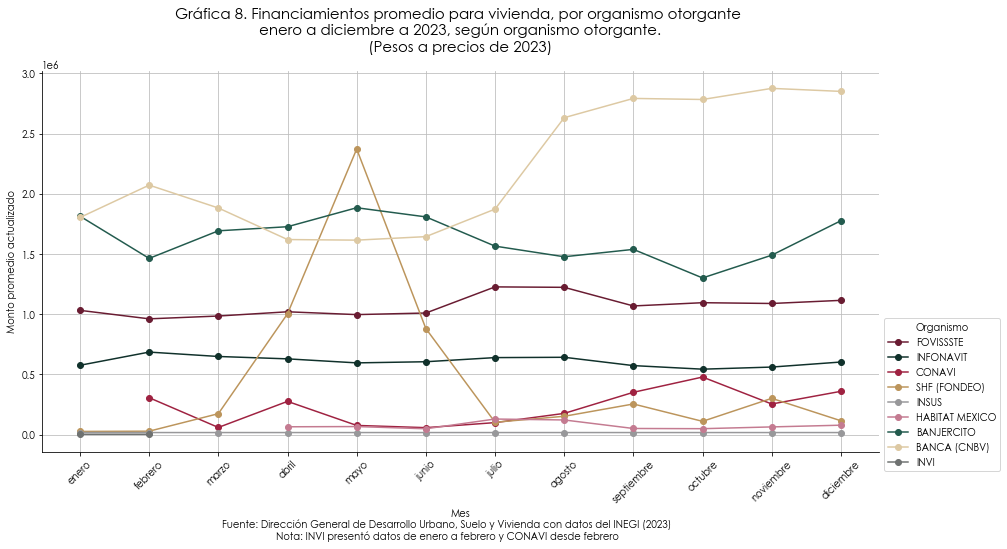

In [51]:
# Definición de la figura
fig, ax = plt.subplots(figsize=(15, 7))

# Iterar sobre cada organismo y graficar el monto promedio actualizado por mes
for i, organismo in enumerate(lista_organismos):
    df_organismo = df_actualizado[df_actualizado['organismo'] == organismo]
    monto_promedio_mensual = df_organismo.groupby('mes')['monto_prom_actualizado'].mean().reset_index()
    ax.plot(monto_promedio_mensual['mes'], monto_promedio_mensual['monto_prom_actualizado'], marker='o', linestyle='-', label=organismo, color=colores[i % len(colores)])

# Configurar título y etiquetas de los ejes
ax.set_title('Gráfica 8. Financiamientos promedio para vivienda, por organismo otorgante \n enero a diciembre a 2023, según organismo otorgante. \n (Pesos a precios de 2023) ', fontsize=15, loc='center', pad=20)
ax.set_xlabel('Mes')
ax.set_ylabel('Monto promedio actualizado')

# Agregar la fuente al pie de la gráfica
plt.figtext(0.5, -0.05, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del INEGI (2023)\nNota: INVI presentó datos de enero a febrero y CONAVI desde febrero', ha='center', fontsize=10)

# Mostrar la leyenda afuera de la gráfica en el lado derecho
plt.legend(title='Organismo', fontsize=10, loc='center left', bbox_to_anchor=(1, 0.15))

# Líneas horizontales en el gráfico
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#bdbdbd')
ax.xaxis.grid(True, color='#bdbdbd')

# Rotar las etiquetas del eje x para mayor legibilidad
ax.tick_params(axis='x', rotation=45)

# Ocultar marco en el lado derecho y arriba
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

- Gráfica 9. Total de financiamientos de vivienda, por organismo otorgante y sexo 2023 (cantidad de acciones)	

In [52]:
# Obtención de los datos por sexo y rangos de edad de financiamientos de vivienda
url1="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2023,2023/0/0/organismo,genero,rango_edad,anio,mes"
r=requests.get(url1)
print(r.status_code)

200


In [53]:
#Crear dataframe 
df1=pd.DataFrame(r.json())

# Filtrar el DataFrame para excluir 'No disponible' en 'grupo_edad'
df_nd = df1[df1['grupo_edad'] != 'No disponible']
df_nd.head()

,año,mes,organismo,sexo,grupo_edad,acciones,monto
1,2023,enero,FOVISSSTE,Hombre,29 o menos,87,67409665.15
2,2023,febrero,FOVISSSTE,Hombre,29 o menos,122,94277688.96
3,2023,marzo,FOVISSSTE,Hombre,29 o menos,146,106917046.01
4,2023,abril,FOVISSSTE,Hombre,29 o menos,152,116140306.58
5,2023,mayo,FOVISSSTE,Hombre,29 o menos,183,142524265.90


In [54]:
# Calcular el total de financiamientos por grupo de edad y sexo (excluyendo 'No disponible')
total_financiamientos = df_nd.groupby(['sexo','organismo'])['acciones'].sum()

# Reorganizar los datos para tener grupos de edad como barras y separados por sexo
total_financiamientos = total_financiamientos.unstack()
total_financiamientos = total_financiamientos.fillna(0)
total_financiamientos = total_financiamientos.astype(int)

total_financiamientos

organismo,BANCA (CNBV),BANJERCITO,CONAVI,FOVISSSTE,HABITAT MEXICO,INFONAVIT,INSUS,INVI,SHF (FONDEO)
sexo,,,,,,,,,
Hombre,103904,0,24404,15910,120,256832,2438,1763,15485
Mujer,66702,560,46136,20773,727,165363,2941,3235,23632


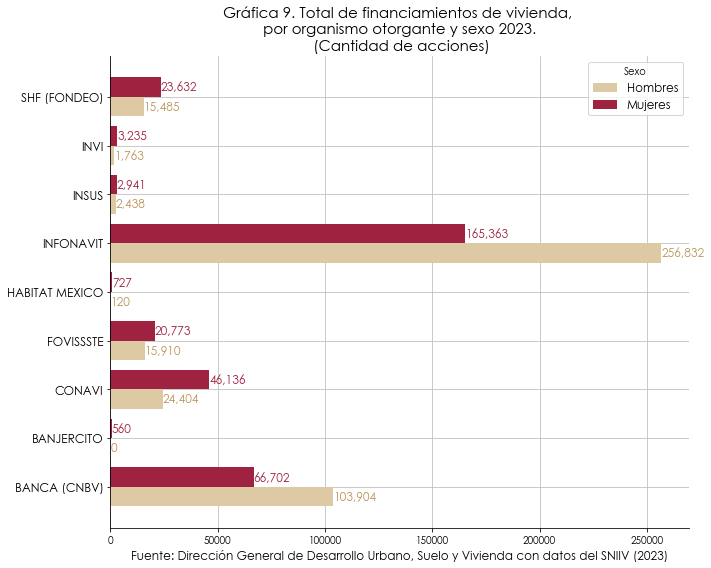

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {
    'organismo': ['BANCA (CNBV)', 'BANJERCITO', 'CONAVI', 'FOVISSSTE', 'HABITAT MEXICO', 'INFONAVIT', 'INSUS', 'INVI', 'SHF (FONDEO)'],
    'Hombre': [103904, 0, 24404, 15910, 120, 256832, 2438, 1763, 15485],
    'Mujer': [66702, 560, 46136, 20773, 727, 165363, 2941, 3235, 23632]
}

df = pd.DataFrame(data)
df.set_index('organismo', inplace=True)

# Crear la gráfica de barras horizontal
fig, ax = plt.subplots(figsize=(10, 8))

# Definir el ancho de cada barra
bar_width = 0.40

# Crear un array de índices para las barras
indices = np.arange(len(df.index))

# Dibujar barras para Hombres
ax.barh(indices - bar_width/2, df['Hombre'], bar_width, color='#ddc9a3', label='Hombres')
for i, (value, name) in enumerate(zip(df['Hombre'], df.index)):
    ax.text(value, i - bar_width/2, f'{value:,.0f}', ha='left', va='center', color='#bc955c', fontsize=12)

# Dibujar barras para Mujeres
ax.barh(indices + bar_width/2, df['Mujer'], bar_width, color='#9f2241', label='Mujeres')
for i, (value, name) in enumerate(zip(df['Mujer'], df.index)):
    ax.text(value, i + bar_width/2, f'{value:,.0f}', ha='left', va='center', color='#9f2241', fontsize=12)

# Líneas horizontales y verticales en el gráfico
ax.set_axisbelow(True)
ax.xaxis.grid(True, color='#bdbdbd')
ax.yaxis.grid(True, color='#bdbdbd')

# Añadir etiquetas, título y leyenda
ax.set_yticks(indices)
ax.set_yticklabels(df.index, fontsize=12)
ax.set_xlabel('Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)', fontsize=12)
ax.set_title('Gráfica 9. Total de financiamientos de vivienda, \n por organismo otorgante y sexo 2023. \n (Cantidad de acciones)', fontsize=15, loc='center')
ax.legend(title='Sexo', fontsize=12)

# Quitar el marco de arriba y de la derecha
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


- Gráfica 10. Financiamientos de vivienda según sexo y organismo otorgante 2023 (porcentaje de acciones)

In [56]:
# Calcular el total de financiamientos por sexo
total_financiamientos_por_sexo = df.sum(axis=1)

# Calcular los porcentajes por sexo y organismo
p_so = df.div(total_financiamientos_por_sexo, axis=0) * 100
p_so

,Hombre,Mujer
organismo,,
BANCA (CNBV),60.90,39.10
BANJERCITO,0.00,100.00
CONAVI,34.60,65.40
FOVISSSTE,43.37,56.63
HABITAT MEXICO,14.17,85.83
INFONAVIT,60.83,39.17
INSUS,45.32,54.68
INVI,35.27,64.73
SHF (FONDEO),39.59,60.41


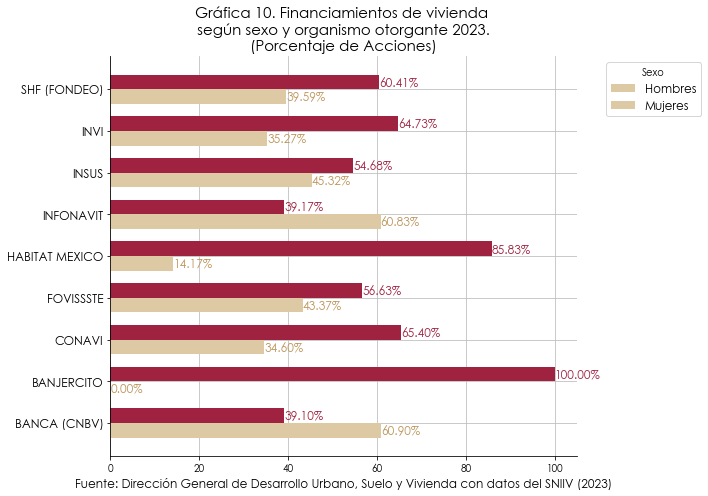

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame con los porcentajes por sexo y organismo
p_so = pd.DataFrame({
    'Hombre': [60.90, 0.00, 34.60, 43.37, 14.17, 60.83, 45.32, 35.27, 39.59],
    'Mujer': [39.10, 100.00, 65.40, 56.63, 85.83, 39.17, 54.68, 64.73, 60.41]
}, index=['BANCA (CNBV)', 'BANJERCITO', 'CONAVI', 'FOVISSSTE', 'HABITAT MEXICO', 'INFONAVIT', 'INSUS', 'INVI', 'SHF (FONDEO)'])

# Crear la gráfica de barras horizontal
fig, ax = plt.subplots(figsize=(10, 7))

# Definir el ancho de cada barra
bar_width = 0.35

# Crear una lista de índices para las barras
indices = list(range(len(p_so.index)))

# Dibujar barras para Hombres
for i, (value, name) in enumerate(zip(p_so['Hombre'], p_so.index)):
    ax.barh(i - bar_width/2, value, bar_width, color='#ddc9a3')
    ax.text(value, i - bar_width/2, f'{value:.2f}%', ha='left', va='center', color='#bc955c', fontsize=12)

# Dibujar barras para Mujeres
for i, (value, name) in enumerate(zip(p_so['Mujer'], p_so.index)):
    ax.barh(i + bar_width/2, value, bar_width, color='#9f2241')
    ax.text(value, i + bar_width/2, f'{value:.2f}%', ha='left', va='center', color='#9f2241', fontsize=12)

# Líneas horizontales en el gráfico
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#bdbdbd')
ax.xaxis.grid(True, color='#bdbdbd')

# Añadir etiquetas, título y leyenda
ax.set_yticks(indices)
ax.set_yticklabels(p_so.index, fontsize=12)
ax.set_xlabel('Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)', fontsize=12)
ax.set_title('Gráfica 10. Financiamientos de vivienda \n según sexo y organismo otorgante 2023. \n(Porcentaje de Acciones)', fontsize=15, loc='center')
ax.legend(['Hombres', 'Mujeres'], title='Sexo', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

# Quitar el marco de arriba y de la derecha
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


- Gráfica 11. Total de acciones para vivienda por sexo y rango de ingresos, 2023  (Cantidad de Acciones)

In [255]:
# Obtención de los datos por sexo y rangos de edad de financiamientos de vivienda
url2="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2023,2023/0/0/organismo,genero,rango_salarial,anio,mes"
r=requests.get(url2)
print(r.status_code)

200


In [256]:
df2=pd.DataFrame(r.json())
df2.head()

,año,mes,organismo,sexo,rango_salarial,acciones,monto
0,2023,enero,FOVISSSTE,Hombre,2.6 o menos,45,20309748.77
1,2023,febrero,FOVISSSTE,Hombre,2.6 o menos,39,16878390.94
2,2023,marzo,FOVISSSTE,Hombre,2.6 o menos,75,34906382.61
3,2023,abril,FOVISSSTE,Hombre,2.6 o menos,72,34532753.32
4,2023,mayo,FOVISSSTE,Hombre,2.6 o menos,84,66104869.17


In [257]:
# Ver los rangos salariales: 
print("Rangos Salariales: ",df2["rango_salarial"].unique())   

Rangos Salariales:  ['2.6 o menos' '2.61 a 4.00' '4.01 a 6.00' '6.01 a 9.00' '9.01 a 12.00'
 'Más de 12' 'No disponible']


In [258]:
# Filtrar el DataFrame para excluir 'No disponible' en 'rango_salarial'
df_nd = df2[(df2['rango_salarial'] != 'No disponible') & (df2['sexo'] != 'No disponible')]

total_financiamientos = df_nd.groupby(['rango_salarial', 'sexo'])['acciones'].sum()
total_financiamientos

rango_salarial  sexo  
2.6 o menos     Hombre    64576
                Mujer     56558
2.61 a 4.00     Hombre    75813
                Mujer     71807
4.01 a 6.00     Hombre    75167
                Mujer     47882
6.01 a 9.00     Hombre    58501
                Mujer     30981
9.01 a 12.00    Hombre    30832
                Mujer     16501
Más de 12       Hombre    72927
                Mujer     33105
Name: acciones, dtype: int64

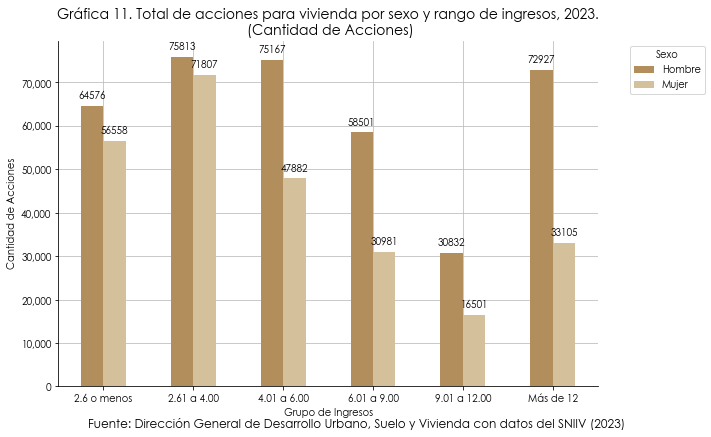

In [259]:
import matplotlib.ticker as ticker

# Filtrar el DataFrame para excluir 'No disponible' en 'rango_salarial'
df_nd = df2[(df2['rango_salarial'] != 'No disponible') & (df2['sexo'] != 'No disponible')]

total_financiamientos = df_nd.groupby(['rango_salarial', 'sexo'])['acciones'].sum()

# Reorganizar los datos para tener 'rango_salarial' como barras y separados por 'sexo'
total_financiamientos = total_financiamientos.unstack()

# Definir colores personalizados para los sexos
colors = {'Hombre': '#b38e5d', 'Mujer': '#d4c19c'}

# Crear un gráfico de barras con colores personalizados
ax = total_financiamientos.plot(kind='bar', figsize=(10, 6), color=[colors[col] for col in total_financiamientos.columns])

# Añadir cantidad de acciones a cada barra
for p in ax.patches:
    ax.annotate(locale.format_string('%d', p.get_height(), grouping=True), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Líneas horizontales en el gráfico
ax.set_axisbelow(True)
ax.xaxis.grid(True, color='#bdbdbd')
ax.yaxis.grid(True, color='#bdbdbd')

# Formatear etiquetas en el eje y con separadores de miles
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Añadir etiquetas y título
plt.title('Gráfica 11. Total de acciones para vivienda por sexo y rango de ingresos, 2023.\n (Cantidad de Acciones)',horizontalalignment='center', fontsize=14)
plt.xlabel('Grupo de Ingresos')
plt.ylabel('Cantidad de Acciones')
plt.xticks(rotation=0, ha='center')
plt.figtext(0.5, 0.001, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)', horizontalalignment='center', fontsize=12)

# Añadir leyenda en el lado derecho, fuera del gráfico
plt.legend(title='Sexo', bbox_to_anchor=(1.05, 1), loc='upper left')

# Quitar el marco de arriba y de la derecha
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

- Gráfica 12. Total de financiamientos de vivienda otorgado por rango de edad y sexo 2023 (Monto)

In [260]:
# Calcular el total de financiamientos por modalidad y sexo
total_montos = df_nd.groupby(['rango_salarial', 'sexo'])['monto'].sum()

# Reorganizar los datos para tener 'rango_salarial' como índice y 'sexo' como columnas
total_montos = total_montos.unstack()
total_montos.info()
total_montos

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 2.6 o menos to Más de 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hombre  6 non-null      float64
 1   Mujer   6 non-null      float64
dtypes: float64(2)
memory usage: 144.0+ bytes


sexo,Hombre,Mujer
rango_salarial,,
2.6 o menos,15423875268.29,15037957841.99
2.61 a 4.00,30421178882.90,30710548566.82
4.01 a 6.00,38791185782.30,28439160231.83
6.01 a 9.00,45093853876.22,28608054444.69
9.01 a 12.00,33351897349.84,20554097305.61
Más de 12,158028469177.33,68369049424.33


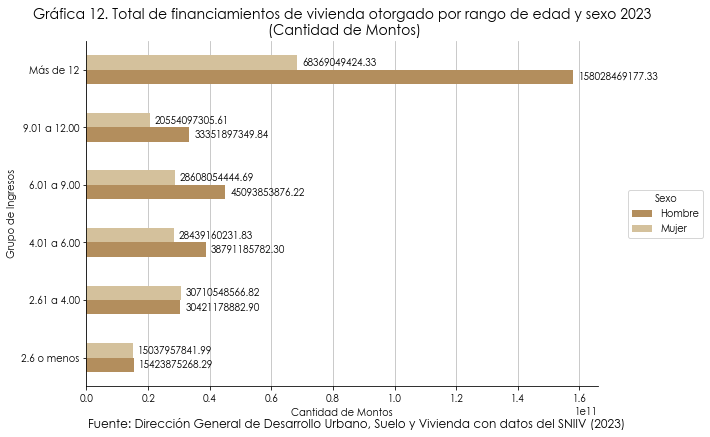

In [261]:
# Crear un gráfico de barras horizontal con colores personalizados
ax = total_montos.plot(kind='barh', figsize=(10, 6), color=[colors[col] for col in total_montos.columns])

# Añadir cantidad de montos a cada barra
for p in ax.patches:
    ax.annotate(locale.format_string('%.2f', p.get_width(), grouping=True), (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

# Líneas horizontales en el gráfico
ax.set_axisbelow(True)
ax.xaxis.grid(True, color='#bdbdbd')

# Añadir etiquetas y título
plt.title('Gráfica 12. Total de financiamientos de vivienda otorgado por rango de edad y sexo 2023\n (Cantidad de Montos)',horizontalalignment='center', fontsize=14)
plt.xlabel('Cantidad de Montos')
plt.ylabel('Grupo de Ingresos')
plt.yticks(rotation=0, ha='right')
plt.figtext(0.5, 0.001, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)', horizontalalignment='center', fontsize=12)

# Quitar el marco de arriba y de la derecha
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Mostrar la leyenda en el medio del lado derecho
plt.legend(title='Sexo', bbox_to_anchor=(1.05, 0.5), loc='center left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Financiamientos para vivienda por entidad federativa	
- Tabla 1. Total de financiamientos de vivienda otorgadas por mes, 2023(Cantidad de monto)


In [65]:
# Obtención de los datos por sexo y rangos de edad de financiamientos de vivienda
urlf="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2022,2023/0/0/anio,mes"
r=requests.get(urlf)
print(r.status_code)
dff=pd.DataFrame(r.json())

200


In [66]:
# Crear un diccionario para mapear los nombres de los meses a su orden numérico
meses_ordenados = {
    "enero": 1, "febrero": 2, "marzo": 3, "abril": 4, "mayo": 5, "junio": 6,
    "julio": 7, "agosto": 8, "septiembre": 9, "octubre": 10, "noviembre": 11, "diciembre": 12
}

# Agregar una nueva columna para el orden de los meses
dff['Nombre del mes'] = dff['mes'].map(meses_ordenados)

# Reorganizar el DataFrame usando pivot y ordenar los meses
dff_monto = dff.pivot(index='Nombre del mes', columns='año', values='monto')

# Restaurar el nombre del índice
dff_monto.index = dff_monto.index.map({v: k for k, v in meses_ordenados.items()})
dff_monto


año,2022,2023
Nombre del mes,,
enero,27075908565.49,28423539346.21
febrero,34241070574.95,35757175711.55
marzo,45078319844.03,45278197483.39
abril,37881641764.26,35755654098.23
mayo,43905778552.80,43687332883.51
junio,46076271566.93,49531566216.39
julio,42709870291.86,42690596602.90
agosto,45548883545.97,46937655297.03
septiembre,43167482981.51,44252364779.45


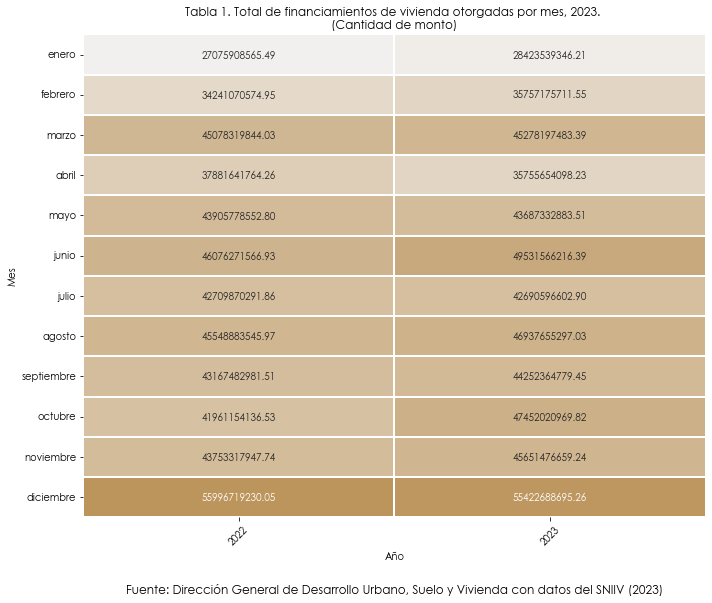

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir el color base y tonos
color_base = '#bc955c'
tonos_color = sns.light_palette(color_base, as_cmap=True)

# Crear una tabla de calor con el mapa de colores personalizado
plt.figure(figsize=(10, 8))
ax = sns.heatmap(dff_monto, cmap=tonos_color, annot=True, fmt=".2f", linewidths=.10, cbar=False)
plt.title('Tabla 1. Total de financiamientos de vivienda otorgadas por mes, 2023. \n(Cantidad de monto)')
plt.xlabel('Año')
plt.ylabel('Mes')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Agregar la fuente
plt.text(0.5, -0.15, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)',
         horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12)

# Guardar la tabla de calor como imagen
plt.savefig('tabla_financiamiento_viv.png')

# Mostrar la tabla de calor
plt.show()

 - Tabla 2 Total de Financiamientos de vivienda otorgadas por mes, 2023 (Cantidad de acciones)

In [68]:
# Reorganizar el DataFrame usando pivot y ordenar los meses
dff_acciones = dff.pivot(index='Nombre del mes', columns='año', values='acciones')

# Restaurar el nombre del índice
dff_acciones.index = dff_acciones.index.map({v: k for k, v in meses_ordenados.items()})
dff_acciones


año,2022,2023
Nombre del mes,,
enero,54603,40226
febrero,57255,48345
marzo,64212,70339
abril,55534,48034
mayo,58897,65376
junio,65086,99801
julio,75946,58346
agosto,77795,58934
septiembre,98264,59579


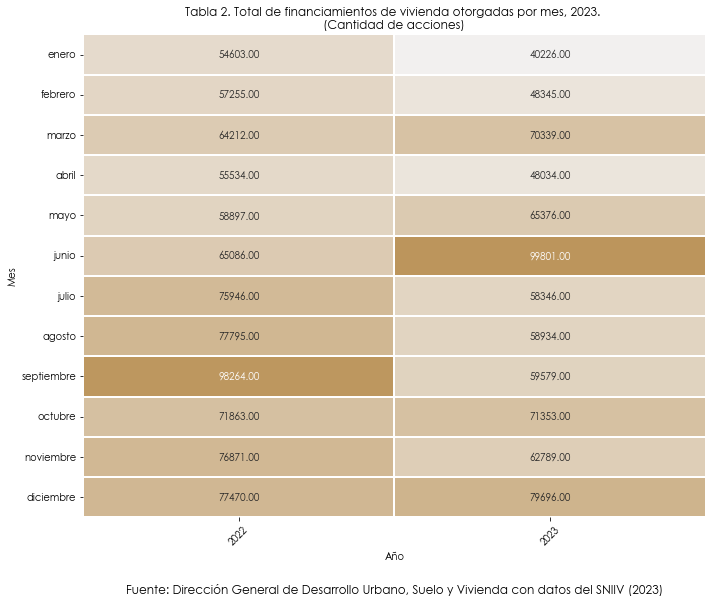

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir el color base y tonos
color_base = '#bc955c'
tonos_color = sns.light_palette(color_base, as_cmap=True)

# Crear una tabla de calor con el mapa de colores personalizado
plt.figure(figsize=(10, 8))
ax = sns.heatmap(dff_acciones, cmap=tonos_color, annot=True, fmt=".2f", linewidths=.10, cbar=False)
plt.title('Tabla 2. Total de financiamientos de vivienda otorgadas por mes, 2023. \n(Cantidad de acciones)')
plt.xlabel('Año')
plt.ylabel('Mes')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Agregar la fuente
plt.text(0.5, -0.15, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)',
         horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12)

# Guardar la tabla de calor como imagen
plt.savefig('tabla_financiamiento_viv.png')

# Mostrar la tabla de calor
plt.show()

- Figura 1. Cantidad de acciones de financiamiento de vivienda anual 2023, por entidad federativa.

### Cartografía para crar mapas :) 


In [268]:
#Cartografía pára crar el mapa :) 
# Leer el archivo GeoJSON
estados = gpd.read_file("https://raw.githubusercontent.com/strotgen/mexico-leaflet/master/states.geojson")

# Renombrar Distrito Federal como Ciudad de México
estados['state_name'] = estados['state_name'].replace({'Distrito Federal': 'Ciudad de México'})

In [269]:
estados.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          0 non-null      object  
 1   state_code  32 non-null     int64   
 2   state_name  32 non-null     object  
 3   geometry    32 non-null     geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 1.1+ KB


In [294]:
url3="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2023,2023/00/0/estado,anio"
r=requests.get(url3)
print(r.status_code)
df3=pd.DataFrame(r.json())

# Filtrar el DataFrame para excluir 'No disponible' en 'rango_salarial'
df3 = df3[(df3['estado'] != 'No distribuido')]
df3

200


,año,estado,acciones,monto
1,2023,Aguascalientes,14336,9397462059.17
2,2023,Baja California,31482,21291554807.64
3,2023,Baja California Sur,6235,5080843332.80
4,2023,Campeche,7611,2234591638.87
5,2023,Coahuila de Zaragoza,28887,18773140567.65
6,2023,Colima,6239,4104562906.90
7,2023,Chiapas,35815,7358580417.94
8,2023,Chihuahua,34952,22109842276.91
9,2023,Ciudad de México,57140,55330531125.63
10,2023,Durango,14432,6015042782.31


In [297]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 1 to 32
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   año       32 non-null     int64  
 1   estado    32 non-null     object 
 2   acciones  32 non-null     int64  
 3   monto     32 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ KB


In [298]:
df3["acciones"].sum()

762818

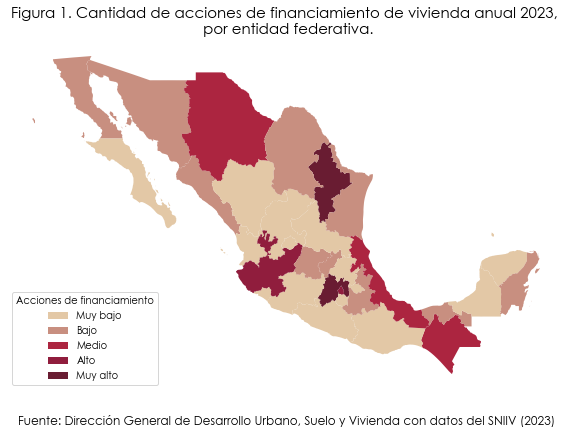

In [299]:
import geopandas as gpd
import pandas as pd
import requests
import matplotlib.pyplot as plt
from matplotlib.patches import Patch  
from matplotlib.colors import ListedColormap

# Fusionar GeoDataFrame de estados con DataFrame de acciones de financiamiento
edo = estados.merge(df3, left_on='state_name', right_on='estado', how='inner')

paleta = ["#e3c8a6ff", "#c88f80ff", "#ac2540ff", "#901d3dff", "#691c32ff"]

# Definir significado de cantidad del número de acciones por color
niveles = ["Muy bajo", "Bajo", "Medio", "Alto", "Muy alto"]

# Crear leyenda personalizada
legend_elements = [Patch(facecolor=color, label=label) for color, label in zip(paleta, niveles)]

# Convertir lista de colores a un objeto de paleta de colores
cmap_paleta = ListedColormap(paleta)

# Visualizar mapa de puntos con cantidad de acciones por estado
fig, ax = plt.subplots(figsize=(10, 10))
edo.plot(ax=ax, column='acciones', cmap=cmap_paleta, legend=False, linewidth=0.0, edgecolor='None')
plt.title('Figura 1. Cantidad de acciones de financiamiento de vivienda anual 2023, \n por entidad federativa.', fontdict={'fontsize': 15})
plt.text(0.5, -0.1, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)', ha='center', transform=ax.transAxes, fontsize=12)
plt.axis('off')  # Quitar el marco del mapa
plt.legend(handles=legend_elements, title='Acciones de financiamiento', loc='lower left', fontsize=10)  # Ubica la leyenda en el lado izquierdo
plt.show()


- Tabla 3. Entidades federativas con mayor y menor cantidad de acciones de financiamiento de vivienda anual 2023. 

In [303]:
# Ordenar el DataFrame por la columna 'acciones'
df3_sorted = df3.sort_values(by='acciones', ascending=False)

In [304]:
# Obtener los 5 estados con la mayor cantidad de acciones
top_5_estados_mas_acciones = df3_sorted.head(5)
top_5_estados_mas_acciones

,año,estado,acciones,monto
15,2023,México,75995,43137499476.44
19,2023,Nuevo León,66868,57074506519.26
14,2023,Jalisco,61102,49560457363.79
9,2023,Ciudad de México,57140,55330531125.63
7,2023,Chiapas,35815,7358580417.94


In [305]:
# Obtener los 5 estados con la menor cantidad de acciones
top_5_estados_menos_acciones = df3_sorted.tail(5)
top_5_estados_menos_acciones

,año,estado,acciones,monto
6,2023,Colima,6239,4104562906.90
3,2023,Baja California Sur,6235,5080843332.80
18,2023,Nayarit,5447,5750729925.20
32,2023,Zacatecas,4427,2505536925.22
29,2023,Tlaxcala,4288,1960190800.68


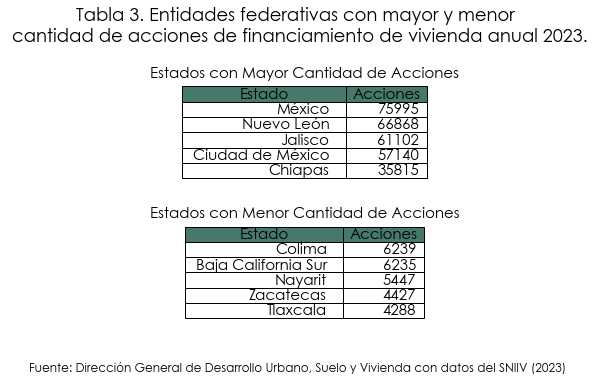

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Fuente de los textos
fuente = "Century Gothic"

# Crear la figura y los ejes con un tamaño más grande
fig, axs = plt.subplots(2, 1, figsize=(8, 3.5))  # Aumenta el tamaño de la figura

# Títulos de las tablas
titulo_general = "Tabla 3. Entidades federativas con mayor y menor \n cantidad de acciones de financiamiento de vivienda anual 2023."
titulo_tabla_mas_acciones = "Estados con Mayor Cantidad de Acciones"
titulo_tabla_menos_acciones = "Estados con Menor Cantidad de Acciones"

# Definir color de la tabla
colors = ['#235b4eff', '#D3EEE1']  # Gris claro a blanco
cm = LinearSegmentedColormap.from_list('custom', colors, N=6)

# Tabla para los 5 estados con la mayor cantidad de acciones
tabla_mas_acciones = axs[0].table(cellText=top_5_estados_mas_acciones[['estado', 'acciones']].values,
                                  colLabels=['Estado', 'Acciones'],
                                  loc='center', colColours=[cm(0.30), cm(0.30)])


tabla_mas_acciones.auto_set_font_size(False)  # Desactiva el ajuste automático del tamaño de la fuente
tabla_mas_acciones.set_fontsize(15)  # Aumenta el tamaño de la fuente
tabla_mas_acciones.auto_set_column_width(col=list(range(len(top_5_estados_mas_acciones.columns))))
tabla_mas_acciones.scale(1, 2.2)  # Aumenta el tamaño de la tabla

# Agregar título sobre la tabla
axs[0].set_title(titulo_tabla_mas_acciones, fontsize=15, fontname=fuente, pad=30)  # Utiliza pad para ajustar la distancia entre el título y la tabla

# Tabla para los 5 estados con la menor cantidad de acciones
tabla_menos_acciones = axs[1].table(cellText=top_5_estados_menos_acciones[['estado', 'acciones']].values,
                                     colLabels=['Estado', 'Acciones'],
                                     loc='center', colColours=[cm(0.30), cm(0.30)])


tabla_menos_acciones.auto_set_font_size(False)  # Desactiva el ajuste automático del tamaño de la fuente
tabla_menos_acciones.set_fontsize(15)  # Aumenta el tamaño de la fuente
tabla_menos_acciones.auto_set_column_width(col=list(range(len(top_5_estados_menos_acciones.columns))))
tabla_menos_acciones.scale(1, 2.2)  # Aumenta el tamaño de la tabla

# Agregar título sobre la tabla
axs[1].set_title(titulo_tabla_menos_acciones, fontsize=15, fontname=fuente, pad=30)  # Utiliza pad para ajustar la distancia entre el título y la tabla

# Ajustar el espacio entre los títulos de las tablas
plt.subplots_adjust(hspace=1.8)

# Agregar la fuente debajo de la segunda tabla
plt.text(0.5, -0.15, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)',
         horizontalalignment='center', verticalalignment='center', transform=fig.transFigure, fontsize=12, fontname=fuente)

# Ocultar los ejes
for ax in axs:
    ax.axis('off')

# Agregar título general
plt.suptitle(titulo_general, fontsize=18, fontname=fuente, y=1.28)  # Ajusta la posición vertical del título general

# Guardar la imagen
plt.savefig('top_5_estados_acciones.png', bbox_inches='tight')

# Mostrar la imagen
plt.show()


- Figura 2. Variación porcentual de acciones de financiamiento de vivienda anual 2023.

In [271]:
url4="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2022,2023/00/0/estado,anio"
r=requests.get(url4)
print(r.status_code)
df4=pd.DataFrame(r.json())

# Filtrar el DataFrame para excluir 'No disponible' en 'rango_salarial'
df4 = df4[(df4['estado'] != 'No distribuido')]

200


In [272]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 2 to 65
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   año       64 non-null     int64  
 1   estado    64 non-null     object 
 2   acciones  64 non-null     int64  
 3   monto     64 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.5+ KB


In [273]:
# Crear una tabla pivote con los nombres de los estados como índice y las acciones para los años 2022 y 2023 como columnas
finac = df4.pivot_table(index='estado', columns='año', values='acciones', aggfunc='sum').reset_index()

# Renombrar las columnas para que coincidan con las especificaciones
finac.rename(columns={2022: 'acciones 2022', 2023: 'acciones 2023'}, inplace=True)

# Ordenar el DataFrame por el nombre del estado
finac.sort_values(by='estado', inplace=True)

# Reiniciar los índices
finac.reset_index(drop=True, inplace=True)

In [274]:
#Crear una columna con la variación porcentual 'Variación (%)
finac['variación (%)'] = ((finac['acciones 2023'] - finac['acciones 2022']) / finac['acciones 2022']) * 100

In [275]:
# Calculamos el valor más bajo y más alto de la variación porcentual
min = finac['variación (%)'].min()
max = finac['variación (%)'].max()

# Imprimimos los valores mínimo y máximo
print("Valor más bajo de la variación porcentual:", min)
print("Valor más alto de la variación porcentual:", max)

Valor más bajo de la variación porcentual: -52.05289788794442
Valor más alto de la variación porcentual: 16.02453335358791


In [276]:
# Fusionar GeoDataFrame de estados con DataFrame de acciones de financiamiento
edo_f = estados.merge(finac, left_on='state_name', right_on='estado', how='inner')

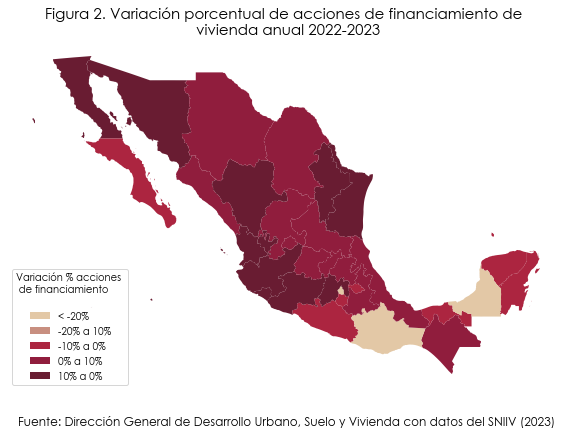

In [277]:
import geopandas as gpd
import pandas as pd
import requests
import matplotlib.pyplot as plt
from matplotlib.patches import Patch  
from matplotlib.colors import ListedColormap
import numpy as np

# Definir paleta de colores para la variación porcentual
paleta_variacion = ["#e3c8a6ff", "#c88f80ff", "#ac2540ff", "#901d3dff", "#691c32ff"]

# Definir límites de los rangos de variación porcentual
rangos = [-np.inf, -20, -10, 0, 10, 20, np.inf]

# Definir etiquetas de los rangos
etiquetas = ["< -20%", "-20% a 10%", "-10% a 0%", "0% a 10%", "10% a 0%", "> 20%"]

# Crear leyenda personalizada para la variación porcentual
leyenda_variacion = [Patch(facecolor=paleta_variacion[i], label=etiquetas[i]) for i in range(len(paleta_variacion))]

# Convertir lista de colores a un objeto de paleta de colores para la variación porcentual
cmap_variacion = ListedColormap(paleta_variacion)

# Visualizar mapa de variación porcentual de acciones de financiamiento
fig, ax = plt.subplots(figsize=(10, 10))
edo_f.plot(ax=ax, column='variación (%)', cmap=cmap_variacion, legend=False, linewidth=0.0, edgecolor='None')
plt.title('Figura 2. Variación porcentual de acciones de financiamiento de \n vivienda anual 2022-2023', fontdict={'fontsize': 15})
plt.text(0.5, -0.1, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)', ha='center', transform=ax.transAxes, fontsize=12)
plt.axis('off')  # Quitar el marco del mapa
plt.legend(handles=leyenda_variacion, title='Variación % acciones \n de financiamiento \n', loc='lower left', fontsize=10)  # Ubicar la leyenda en el lado izquierdo
plt.show()

- Tabla 4. Entidades federativas con mayor y menor variación en acciones de financiamiento de vivienda anual 2023.

In [278]:
# Ordenar el DataFrame por la columna 'acciones'
finac = finac.sort_values(by='variación (%)', ascending=False)
finac.head()

año,estado,acciones 2022,acciones 2023,variación (%)
13,Jalisco,52663,61102,16.02
16,México,66102,75995,14.97
8,Colima,5568,6239,12.05
14,Michoacán de Ocampo,11389,12432,9.16
9,Durango,13270,14432,8.76


In [279]:
# Obtener los 5 estados con la mayor cantidad variación porcentual de financiamientos
estados_may_var = finac.head(5)
estados_menor_var = finac.tail(5)

In [280]:
# Crear DataFrame para los 5 estados con la mayor y menor variación porcentual
top_5_mas_variacion = estados_may_var[['estado', 'variación (%)']]
top_5_menos_variacion = estados_menor_var[['estado', 'variación (%)']]

In [281]:
top_5_menos_variacion['variación (%)'] = top_5_menos_variacion['variación (%)'].round(2)
top_5_mas_variacion['variación (%)'] = top_5_mas_variacion['variación (%)'].round(2)

C:\Users\hp\AppData\Local\Temp\ipykernel_17732\749875139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_menos_variacion['variación (%)'] = top_5_menos_variacion['variación (%)'].round(2)
C:\Users\hp\AppData\Local\Temp\ipykernel_17732\749875139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_mas_variacion['variación (%)'] = top_5_mas_variacion['variación (%)'].round(2)


In [91]:
top_5_menos_variacion

año,estado,variación (%)
11,Guerrero,-23.89
30,Yucatán,-23.93
19,Oaxaca,-39.04
3,Campeche,-48.32
6,Ciudad de México,-52.05


In [92]:
top_5_mas_variacion 

año,estado,variación (%)
13,Jalisco,16.02
16,México,14.97
8,Colima,12.05
14,Michoacán de Ocampo,9.16
9,Durango,8.76


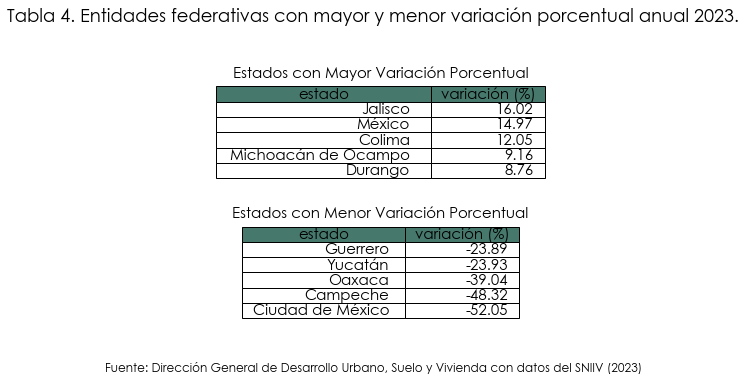

In [282]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# Fuente de los textos
fuente = "Century Gothic"

# Crear la figura y los ejes con un tamaño más grande
fig, axs = plt.subplots(2, 1, figsize=(8, 3.5))  # Aumenta el tamaño de la figura

# Títulos de las tablas
titulo_general = "Tabla 4. Entidades federativas con mayor y menor variación porcentual anual 2023."
titulo_tabla_mas_variacion = "Estados con Mayor Variación Porcentual"
titulo_tabla_menos_variacion = "Estados con Menor Variación Porcentual"

# Definir color de la tabla
colors = ['#235b4eff', '#D3EEE1']  # Gris claro a blanco
cm = LinearSegmentedColormap.from_list('custom', colors, N=6)

# Tabla para los 5 estados con la mayor variación porcentual
tabla_mas_variacion = axs[0].table(cellText=top_5_mas_variacion.values,
                                   colLabels=top_5_mas_variacion.columns,
                                   loc='center', colColours=[cm(0.30), cm(0.30)])

tabla_mas_variacion.auto_set_font_size(False)  # Desactiva el ajuste automático del tamaño de la fuente
tabla_mas_variacion.set_fontsize(15)  # Aumenta el tamaño de la fuente
tabla_mas_variacion.auto_set_column_width(col=list(range(len(top_5_mas_variacion.columns))))
tabla_mas_variacion.scale(1, 2.2)  # Aumenta el tamaño de la tabla

# Agregar título sobre la tabla
axs[0].set_title(titulo_tabla_mas_variacion, fontsize=15, fontname=fuente, pad=30)  # Utiliza pad para ajustar la distancia entre el título y la tabla

# Tabla para los 5 estados con la menor variación porcentual
tabla_menos_variacion = axs[1].table(cellText=top_5_menos_variacion.values,
                                      colLabels=top_5_menos_variacion.columns,
                                      loc='center', colColours=[cm(0.30), cm(0.30)])

tabla_menos_variacion.auto_set_font_size(False)  # Desactiva el ajuste automático del tamaño de la fuente
tabla_menos_variacion.set_fontsize(15)  # Aumenta el tamaño de la fuente
tabla_menos_variacion.auto_set_column_width(col=list(range(len(top_5_menos_variacion.columns))))
tabla_menos_variacion.scale(1, 2.2)  # Aumenta el tamaño de la tabla

# Agregar título sobre la tabla
axs[1].set_title(titulo_tabla_menos_variacion, fontsize=15, fontname=fuente, pad=30)  # Utiliza pad para ajustar la distancia entre el título y la tabla

# Ajustar el espacio entre los títulos de las tablas
plt.subplots_adjust(hspace=1.8)

# Agregar la fuente debajo de la segunda tabla
plt.text(0.5, -0.15, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)',
         horizontalalignment='center', verticalalignment='center', transform=fig.transFigure, fontsize=12, fontname=fuente)

# Ocultar los ejes
for ax in axs:
    ax.axis('off')

# Agregar título general
plt.suptitle(titulo_general, fontsize=18, fontname=fuente, y=1.28)  # Ajusta la posición vertical del título general

# Guardar la imagen
plt.savefig('top_5_estados_variacion.png', bbox_inches='tight')

# Mostrar la imagen
plt.show()


- Figura 3. Monto total de financiamientos de vivienda anual, 2023 por entidad federativa (miles de millones de pesos)

In [283]:
# Filtrar el DataFrame para excluir 'No distribuido en Estado
df4 = df4[(df4['estado'] != 'No distribuido')]

# Crear una tabla pivote con los nombres de los estados como índice y las acciones para los años 2022 y 2023 como columnas
finmon = df4.pivot_table(index='estado', columns='año', values='monto', aggfunc='sum').reset_index()

# Renombrar las columnas para que coincidan con las especificaciones
finmon.rename(columns={2022: 'montos 2022', 2023: 'montos 2023'}, inplace=True)

# Ordenar el DataFrame por el nombre del estado
finmon.sort_values(by='estado', inplace=True)

# Reiniciar los índices
finmon.reset_index(drop=True, inplace=True)

In [284]:
# Fusionar el DataFrame finmon con el GeoDataFrame del mapa de estados
finmon_geo = estados.merge(finmon, how='inner', left_on='state_name', right_on='estado')
finmon_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           0 non-null      object  
 1   state_code   32 non-null     int64   
 2   state_name   32 non-null     object  
 3   geometry     32 non-null     geometry
 4   estado       32 non-null     object  
 5   montos 2022  32 non-null     float64 
 6   montos 2023  32 non-null     float64 
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 1.9+ KB


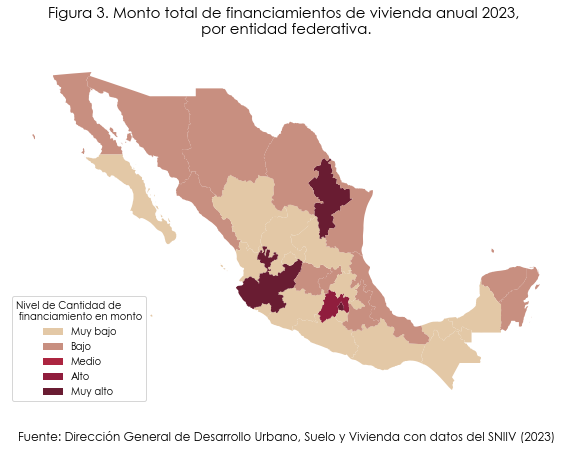

In [286]:
import geopandas as gpd
import pandas as pd
import requests
import matplotlib.pyplot as plt
from matplotlib.patches import Patch  
from matplotlib.colors import ListedColormap

# Fusionar el DataFrame finmon con el GeoDataFrame del mapa de estados
finmon_geo = estados.merge(finmon, how='inner', left_on='state_name', right_on='estado')
finmon_geo

# Definir paleta de colores para la cantidad de acciones
paleta = ["#e3c8a6ff", "#c88f80ff", "#ac2540ff", "#901d3dff", "#691c32ff"]

# Definir significado de cantidad del número de acciones por color
niveles = ["Muy bajo", "Bajo", "Medio", "Alto", "Muy alto"]

# Crear leyenda personalizada
legend_elements = [Patch(facecolor=color, label=label) for color, label in zip(paleta, niveles)]

# Convertir lista de colores a un objeto de paleta de colores
cmap_paleta = ListedColormap(paleta)

# Visualizar mapa de puntos con cantidad de acciones por estado
fig, ax = plt.subplots(figsize=(10, 10))
finmon_geo.plot(ax=ax, column='montos 2023', cmap=cmap_paleta, legend=False, linewidth=0.0, edgecolor='None')
plt.title('Figura 3. Monto total de financiamientos de vivienda anual 2023, \n por entidad federativa. \n', fontdict={'fontsize': 15})
plt.text(0.5, -0.1, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)', ha='center', transform=ax.transAxes, fontsize=12)
plt.axis('off')  # Quitar el marco del mapa
plt.legend(handles=legend_elements, title='Nivel de Cantidad de \n financiamiento en monto', loc='lower left', fontsize=10)  # Ubica la leyenda en el lado izquierdo
plt.show()

- Tabla 5. Entidades federativas con mayor y menor monto de financiamiento individual de vivienda anual 2023.


In [97]:
url_ind="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2023,2023/00/0/estado,tipo_credito,mes"
r=requests.get(url_ind)
print(r.status_code)
df_ind=pd.DataFrame(r.json())

200


In [98]:
df_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   año           2700 non-null   int64  
 1   mes           2700 non-null   object 
 2   estado        2700 non-null   object 
 3   tipo_credito  2700 non-null   object 
 4   acciones      2700 non-null   int64  
 5   monto         2700 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 126.7+ KB


In [99]:
#Quitar los estados no distribuidos
df_ind = df_ind[(df_ind['estado'] != 'No distribuido')]

# Filtrar por crédito individual
credindiv = df_ind.loc[df_ind['tipo_credito'] == 'Credito individual']

In [100]:
# Convertir el mes de tipo objeto a tipo datetime para ordenar correctamente
credindiv.index = pd.to_datetime(credindiv.index, format='%B', errors='coerce')
credindiv = credindiv.dropna()  # Eliminar las filas con fechas que no pudieron ser convertidas

In [102]:
# Obtener los montos totales mensuales por estado 
credindiv= credindiv.groupby(['mes', 'estado',])['monto'].sum().reset_index()
credindiv = credindiv.pivot(index='mes', columns='estado', values='monto')

In [103]:
# Lista de meses en orden
meses_ordenados = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']

# Reordenar el DataFrame según la lista de meses
credindiv = credindiv.reindex(meses_ordenados)
credindiv.head(2)

estado,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Ciudad de México,Coahuila de Zaragoza,Colima,Durango,Guanajuato,Guerrero,Hidalgo,Jalisco,Michoacán de Ocampo,Morelos,México,Nayarit,Nuevo León,Oaxaca,Puebla,Querétaro,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz de Ignacio de la Llave,Yucatán,Zacatecas
mes,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
enero,506912315.83,1131327701.62,274324708.73,122416943.26,305802688.10,1151076445.70,1945204433.15,765555218.12,186625290.24,233159378.09,1016391425.84,230106480.10,419115760.46,2921251934.16,386851406.91,404766688.60,1627400399.81,248212595.68,2617750789.60,133958964.17,670856205.52,1062921742.09,954936338.35,617683434.16,1045284865.86,736926644.89,193682240.79,630409033.96,109428147.73,793753240.34,824685229.82,128533932.52
febrero,508823799.80,1191095817.07,399344611.07,88247401.13,314813249.36,1279340415.17,3485498542.21,1078022924.79,273137636.13,362205423.72,1306942919.10,280064047.79,478661560.50,3140614240.96,486223484.25,438757159.34,2467702716.39,398888382.78,3575247819.88,131565007.00,823127416.66,1381774830.06,1187413095.63,692606360.41,1096018135.07,782106835.58,255164212.41,769857508.83,120275260.50,900236352.77,735419842.78,128482674.64


In [104]:
# DataFrame del INPC con los nombres de los meses 
inpc = pd.DataFrame({
    'mes': ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'],
    'Inpc': [127.336, 128.046, 128.389, 128.363, 128.084, 128.214, 128.832, 129.545, 130.12, 130.609, 131.445, 132.373]
})

In [105]:
# Unir los DataFrames por la columna de mes
credindiv = pd.merge(credindiv, inpc, left_on='mes', right_on='mes', how='left')
credindiv.head(2)

,mes,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Ciudad de México,Coahuila de Zaragoza,Colima,Durango,Guanajuato,Guerrero,Hidalgo,Jalisco,Michoacán de Ocampo,Morelos,México,Nayarit,Nuevo León,Oaxaca,Puebla,Querétaro,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz de Ignacio de la Llave,Yucatán,Zacatecas,Inpc
0,enero,506912315.83,1131327701.62,274324708.73,122416943.26,305802688.10,1151076445.70,1945204433.15,765555218.12,186625290.24,233159378.09,1016391425.84,230106480.10,419115760.46,2921251934.16,386851406.91,404766688.60,1627400399.81,248212595.68,2617750789.60,133958964.17,670856205.52,1062921742.09,954936338.35,617683434.16,1045284865.86,736926644.89,193682240.79,630409033.96,109428147.73,793753240.34,824685229.82,128533932.52,127.34
1,febrero,508823799.80,1191095817.07,399344611.07,88247401.13,314813249.36,1279340415.17,3485498542.21,1078022924.79,273137636.13,362205423.72,1306942919.10,280064047.79,478661560.50,3140614240.96,486223484.25,438757159.34,2467702716.39,398888382.78,3575247819.88,131565007.00,823127416.66,1381774830.06,1187413095.63,692606360.41,1096018135.07,782106835.58,255164212.41,769857508.83,120275260.50,900236352.77,735419842.78,128482674.64,128.05


In [106]:
# Crear un nuevo DataFrame con los montos promedio actualizados por estado y mes
montos_actualizados = pd.DataFrame()  # Crear un DataFrame vacío para almacenar los montos actualizados

# Iterar sobre las columnas de estados en credindiv
for estado in credindiv.columns[1:-1]:
    # Calcular los montos actualizados para cada estado y mes
    montos_actualizados[estado] = round(credindiv[estado] * credindiv['Inpc'] / 100, 2)

# Copiar la columna de mes del DataFrame credindiv al DataFrame montos_actualizados
montos_actualizados['mes'] = credindiv['mes']

# Establecer la columna "mes" como el índice del DataFrame montos_actualizados
montos_actualizados.set_index('mes', inplace=True)
montos_actualizados

,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Ciudad de México,Coahuila de Zaragoza,Colima,Durango,Guanajuato,Guerrero,Hidalgo,Jalisco,Michoacán de Ocampo,Morelos,México,Nayarit,Nuevo León,Oaxaca,Puebla,Querétaro,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz de Ignacio de la Llave,Yucatán,Zacatecas
mes,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
enero,645481866.48,1440587442.14,349314111.11,155880838.86,389396910.93,1465734702.90,2476945517.00,974827392.54,237641179.58,296895825.68,1294232186.01,293008387.50,533685244.74,3719805362.88,492601107.51,515413710.59,2072266573.10,316063990.83,3333339145.44,170577986.61,854241457.86,1353482029.51,1215977735.80,786533377.72,1331023936.79,938372912.53,246627218.13,802737647.49,139341426.20,1010733626.12,1050121184.24,163669968.31
febrero,651528522.69,1525150549.93,511344800.69,112997267.25,403105773.27,1638144228.01,4463041463.36,1380365234.27,349741817.56,463789556.86,1673488130.19,358610810.63,612906981.76,4021430910.98,622589722.64,561810992.25,3159794620.24,510760618.62,4577961823.44,168463728.86,1053981731.94,1769307398.89,1520434972.43,886854740.25,1403407381.23,1001456518.68,326727567.43,985771745.75,154007660.06,1152716640.27,941675691.89,164516925.57
marzo,866461711.10,1871776857.04,541196258.34,185744999.42,555636164.79,2047632354.38,5390536554.66,1876098425.21,428760724.97,644405414.03,2228097940.61,560549131.90,957302093.39,5041499756.94,820816883.43,768190191.78,3492480127.56,556342510.35,5389274568.31,217305270.81,1350622392.65,2210488228.97,2022772401.94,1128035610.01,1729406424.71,1372989430.37,434682301.56,1317645937.84,156366541.31,1523304587.07,1385952605.29,253106864.24
abril,740054675.02,1786646988.01,403688044.46,140074111.65,469156892.77,1578262622.50,4376968670.00,1209594706.64,274290261.48,485334112.00,1488521586.77,434336704.06,818383929.79,3812987920.42,636223549.76,625451768.56,2862321975.53,480009738.64,4229947134.52,196372656.33,1162814422.88,1606319992.59,1684022416.75,926665745.37,1371179868.31,1150737760.96,368524671.67,1143638352.11,138642794.28,1236000784.77,1138233078.51,187461896.11
mayo,877992140.68,2086473082.44,471705271.94,267276657.45,580178411.81,2073536795.67,5294706969.46,1156515324.46,386989475.75,611489610.54,1965294044.63,554914838.20,1072426048.91,5009892292.38,775974390.32,757376347.58,3742480909.37,530513291.76,5301177918.85,226762024.22,1320688938.60,1677946232.06,1761902405.82,969279831.37,1701969439.16,1443832120.67,432630005.94,1273552664.88,185819010.28,1488191081.13,1390617639.52,239406813.58
junio,1036079475.30,1933448300.62,709209071.77,277721023.15,672975130.01,2087743072.85,6241553374.47,2038280381.48,391689812.93,653602823.05,2253273741.08,523717765.23,1159614097.69,4617540985.00,831604648.10,778275004.03,4130022594.95,597304507.99,5871666200.78,205908245.56,1487673264.74,2144300756.90,2130941912.40,1184513916.62,1831206342.58,1746825379.07,494965694.97,1437818932.96,189250983.19,1696563924.89,1359939673.34,314409833.62
julio,837489907.92,1769493561.43,509687408.19,207680133.05,540116769.29,1892381821.24,5042388772.34,1643764998.00,321874998.91,584033783.30,2118652779.00,429650486.39,864082144.03,4673537209.50,793113354.77,677141239.37,3379382111.43,749488156.02,5097055356.32,213481886.40,1299611073.29,1842010513.53,1650119005.06,1040919137.29,1664539629.32,1513676798.33,384867100.91,1375283107.45,179412230.42,1463806163.49,1291825276.53,190083884.13
agosto,964754232.25,2069188233.19,481656541.03,252288414.41,671596068.78,2164410779.65,5418945065.96,1765176466.13,452261004.49,637945203.51,2182746864.67,603163839.29,1199306326.46,5214615147.52,909923717.35,700088709.67,3985866522.38,479320802.71,5435804496.64,203059421.37,1425643530.37,1818462078.08,1887435383.42,1207045882.43,1714114119.06,1627554667.00,475345538.04,1594408618.98,188882647.70,1621600259.39,1405609904.20,243645701.13
septiembre,939770211.59,1857665678.85,560025257.27,178220951.59,618911555.78,2097112374.

In [107]:
# Mostrar los nombres de las columnas del DataFrame montos_actualizados
print("Nombres de las columnas de montos_actualizados:", montos_actualizados.columns)

Nombres de las columnas de montos_actualizados: Index(['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche',
       'Chiapas', 'Chihuahua', 'Ciudad de México', 'Coahuila de Zaragoza',
       'Colima', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco',
       'Michoacán de Ocampo', 'Morelos', 'México', 'Nayarit', 'Nuevo León',
       'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí',
       'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas'],
      dtype='object')


In [108]:
# Mostrar los nombres de las filas del DataFrame montos_actualizados
print("Nombres de las filas de montos_actualizados:", montos_actualizados.index)

Nombres de las filas de montos_actualizados: Index(['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio',
       'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'],
      dtype='object', name='mes')


In [109]:
# Obtener los 5 estados con el monto promedio actualizado más alto
estados_monto_promedio_alto = montos_actualizados.max().nlargest(5)

# Crear DataFrame con nombres de columna personalizados y montos redondeados
top_5_estados_monto_alto_df = pd.DataFrame(estados_monto_promedio_alto)
top_5_estados_monto_alto_df.reset_index(inplace=True)
top_5_estados_monto_alto_df.columns = ['Estado', 'Monto Promedio Actualizado']
top_5_estados_monto_alto_df['Monto Promedio Actualizado'] = top_5_estados_monto_alto_df['Monto Promedio Actualizado'].round(2)
top_5_estados_monto_alto_df


,Estado,Monto Promedio Actualizado
0,Ciudad de México,6241553374.47
1,Nuevo León,6103633690.35
2,Jalisco,5806447733.52
3,México,5472244824.34
4,Baja California,3150617801.50


In [110]:
# Obtener los 5 estados con el monto promedio actualizado más bajo
estados_monto_promedio_bajo = montos_actualizados.min().nsmallest(5)

# Crear DataFrame con nombres de columna personalizados y montos redondeados
top_5_estados_monto_bajo_df = pd.DataFrame(estados_monto_promedio_bajo)
top_5_estados_monto_bajo_df.reset_index(inplace=True)
top_5_estados_monto_bajo_df.columns = ['Estado', 'Monto Promedio Actualizado']
top_5_estados_monto_bajo_df['Monto Promedio Actualizado'] = top_5_estados_monto_bajo_df['Monto Promedio Actualizado'].round(2)
top_5_estados_monto_bajo_df


,Estado,Monto Promedio Actualizado
0,Campeche,112997267.25
1,Tlaxcala,138642794.28
2,Zacatecas,163669968.31
3,Oaxaca,168463728.86
4,Guerrero,170032190.56


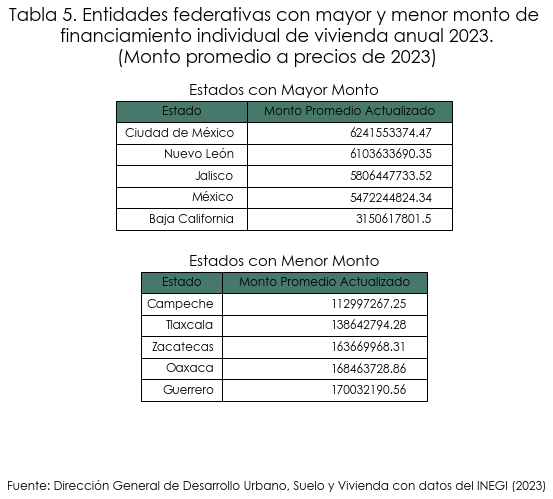

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Fuente de los textos
fuente = "Century Gothic"

# Crear la figura y los ejes con un tamaño más grande
fig, axs = plt.subplots(2, 1, figsize=(8, 5))  # Aumenta el tamaño de la figura

# Títulos de las tablas
titulo_general = "Tabla 5. Entidades federativas con mayor y menor monto de \n financiamiento individual de vivienda anual 2023. \n(Monto promedio a precios de 2023)"
titulo_tabla_monto_alto = "Estados con Mayor Monto"
titulo_tabla_monto_bajo = "Estados con Menor Monto"

# Definir color de la tabla
colors = ['#235b4eff', '#D3EEE1']  # Gris claro a blanco
cm = LinearSegmentedColormap.from_list('custom', colors, N=6)

# Tabla para los 5 estados con el monto promedio actualizado más alto
tabla_monto_alto = axs[0].table(cellText=top_5_estados_monto_alto_df.values,
                                 colLabels=top_5_estados_monto_alto_df.columns,
                                 loc='center', colColours=[cm(0.30), cm(0.30)])


tabla_monto_alto.auto_set_font_size(False)  # Desactiva el ajuste automático del tamaño de la fuente
tabla_monto_alto.set_fontsize(12)  # Aumenta el tamaño de la fuente
tabla_monto_alto.auto_set_column_width(col=list(range(len(top_5_estados_monto_alto_df.columns))))
tabla_monto_alto.scale(1, 2.2)  # Aumenta el tamaño de la tabla

# Agregar título sobre la tabla
axs[0].set_title(titulo_tabla_monto_alto, fontsize=15, fontname=fuente, pad=20)  # Utiliza pad para ajustar la distancia entre el título y la tabla

# Tabla para los 5 estados con el monto promedio actualizado más bajo
tabla_monto_bajo = axs[1].table(cellText=top_5_estados_monto_bajo_df.values,
                                 colLabels=top_5_estados_monto_bajo_df.columns,
                                 loc='center', colColours=[cm(0.30), cm(0.30)])


tabla_monto_bajo.auto_set_font_size(False)  # Desactiva el ajuste automático del tamaño de la fuente
tabla_monto_bajo.set_fontsize(12)  # Aumenta el tamaño de la fuente
tabla_monto_bajo.auto_set_column_width(col=list(range(len(top_5_estados_monto_bajo_df.columns))))
tabla_monto_bajo.scale(1, 2.2)  # Aumenta el tamaño de la tabla

# Agregar título sobre la tabla
axs[1].set_title(titulo_tabla_monto_bajo, fontsize=15, fontname=fuente, pad=20)  # Utiliza pad para ajustar la distancia entre el título y la tabla

# Ajustar el espacio entre los títulos de las tablas
plt.subplots_adjust(hspace=0.7)

# Agregar la fuente debajo de la segunda tabla
plt.text(0.5, -0.15, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del INEGI (2023)',
         horizontalalignment='center', verticalalignment='center', transform=fig.transFigure, fontsize=12, fontname=fuente)

# Ocultar los ejes
for ax in axs:
    ax.axis('off')

# Agregar título general
plt.suptitle(titulo_general, fontsize=18, fontname=fuente, y=1.18)  # Ajusta la posición vertical del título general

# Guardar la imagen
plt.savefig('top_5_estados_monto_actualizado.png', bbox_inches='tight')

# Mostrar la imagen
plt.show()

- Figura 4. Monto promedio de financiamiento individual de vivienda anual 2023, por entidad federativa (pesos)

In [287]:
url_ind1="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2023,2023/00/0/estado,tipo_credito"
r=requests.get(url_ind1)
print(r.status_code)
df_ind1=pd.DataFrame(r.json())

200


In [288]:
#Quitar los estados no distribuidos
df_ind1 = df_ind1[(df_ind1['estado'] != 'No distribuido')]

# Filtrar por crédito individual
credito_individual1 = df_ind1.loc[df_ind1['tipo_credito'] == 'Credito individual']

In [289]:
# Obtener los montos totales mensuales por estado 
credindiv1 = credito_individual1.groupby('estado')['monto'].sum().reset_index()
credindiv1

,estado,monto
0,Aguascalientes,8248450515.81
1,Baja California,18854535134.03
2,Baja California Sur,4679262700.21
3,Campeche,1974813580.53
4,Chiapas,5716485066.84
5,Chihuahua,19328495687.55
6,Ciudad de México,46830218184.70
7,Coahuila de Zaragoza,15535750413.04
8,Colima,3624484971.38
9,Durango,5469623529.69


In [290]:
# Fusionar el DataFrame credindiv1 con el GeoDataFrame del mapa de estados
credindiv1 = estados.merge(credindiv1, how='inner', left_on='state_name', right_on='estado')

# Calcular el monto mínimo y máximo
monto_minimo = credindiv1['monto'].min()
print(monto_minimo)

monto_maximo = credindiv1['monto'].max()
print(monto_maximo)

1688307113.624144
47852185213.14424


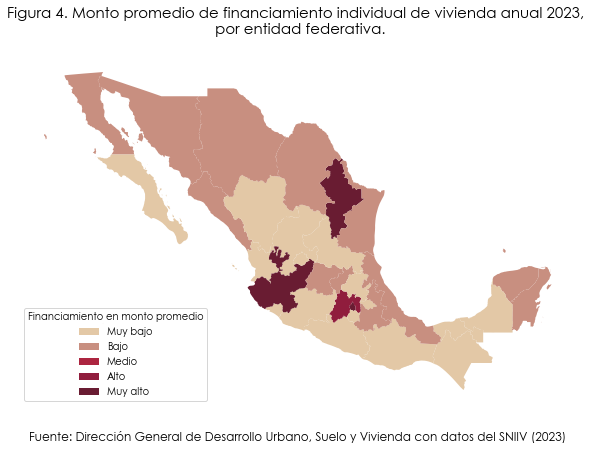

In [291]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap

# Definir paleta de colores para la cantidad de acciones
paleta = ["#e3c8a6ff", "#c88f80ff", "#ac2540ff", "#901d3dff", "#691c32ff"]

# Definir significado de cantidad del número de acciones por color
niveles = ["Muy bajo", "Bajo", "Medio", "Alto", "Muy alto"]

# Crear leyenda personalizada
legend_elements = [Patch(facecolor=color, label=label) for color, label in zip(paleta, niveles)]

# Convertir lista de colores a un objeto de paleta de colores
cmap_paleta = ListedColormap(paleta)

# Visualizar mapa de puntos con cantidad de acciones por estado
fig, ax = plt.subplots(figsize=(10, 10))
credindiv1.plot(ax=ax, column='monto', cmap=cmap_paleta, legend=False, linewidth=0.0, edgecolor='None')
plt.title('Figura 4. Monto promedio de financiamiento individual de vivienda anual 2023, \n por entidad federativa.\n', fontdict={'fontsize': 15})
plt.text(0.5, -0.1, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)', ha='center', transform=ax.transAxes, fontsize=12)
plt.axis('off')  # Quitar el marco del mapa
plt.legend(handles=legend_elements, title='Financiamiento en monto promedio', loc='lower left', fontsize=10)  # Ubica la leyenda en el lado izquierdo
plt.show()

- Tabla 6. Entidades federativas con mayor y menor monto promedio de financiamiento individual de vivienda anual 2023.

In [117]:
url_ind="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2023,2023/00/0/estado,tipo_credito,mes"
r=requests.get(url_ind)
print(r.status_code)
df_ind=pd.DataFrame(r.json())

df_ind.info()

200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   año           2700 non-null   int64  
 1   mes           2700 non-null   object 
 2   estado        2700 non-null   object 
 3   tipo_credito  2700 non-null   object 
 4   acciones      2700 non-null   int64  
 5   monto         2700 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 126.7+ KB


In [119]:
#Quitar los estados no distribuidos
df_ind = df_ind[(df_ind['estado'] != 'No distribuido')]

# Filtrar por crédito individual
credito_individual = df_ind.loc[df_ind['tipo_credito'] == 'Credito individual']

# Convertir el mes de tipo objeto a tipo datetime para ordenar correctamente
credindiv.index = pd.to_datetime(credindiv.index, format='%B', errors='coerce')
credindiv = credindiv.dropna()  # Eliminar las filas con fechas que no pudieron ser convertidas

# Obtener los promedios mensuales por estado 
credindiv= credito_individual.groupby(['mes', 'estado',])['monto'].mean().reset_index()
credindiv = credindiv.pivot(index='mes', columns='estado', values='monto')

# Lista de meses en orden
meses_ordenados = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']

# Reordenar el DataFrame según la lista de meses
credindiv = credindiv.reindex(meses_ordenados)

# DataFrame del INPC con los nombres de los meses 
inpc = pd.DataFrame({
    'mes': ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'],
    'Inpc': [127.336, 128.046, 128.389, 128.363, 128.084, 128.214, 128.832, 129.545, 130.12, 130.609, 131.445, 132.373]
})

# Unir los DataFrames por la columna de mes
credindiv = pd.merge(credindiv, inpc, left_on='mes', right_on='mes', how='left')

# Crear un nuevo DataFrame con los montos promedio actualizados por estado y mes
montos_actualizados = pd.DataFrame()  # Crear un DataFrame vacío para almacenar los montos actualizados

# Iterar sobre las columnas de estados en credindiv
for estado in credindiv.columns[1:-1]:
    # Calcular los montos actualizados para cada estado y mes
    montos_actualizados[estado] = round(credindiv[estado] * credindiv['Inpc'] / 100, 2)
montos_actualizados


,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Ciudad de México,Coahuila de Zaragoza,Colima,Durango,Guanajuato,Guerrero,Hidalgo,Jalisco,Michoacán de Ocampo,Morelos,México,Nayarit,Nuevo León,Oaxaca,Puebla,Querétaro,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz de Ignacio de la Llave,Yucatán,Zacatecas
0,161370466.62,360146860.54,87328527.78,38970209.72,97349227.73,366433675.72,619236379.25,243706848.13,59410294.89,74223956.42,323558046.50,73252096.88,133421311.18,929951340.72,123150276.88,128853427.65,518066643.27,79015997.71,833334786.36,42644496.65,213560364.46,338370507.38,303994433.95,196633344.43,332755984.20,234593228.13,61656804.53,200684411.87,34835356.55,252683406.53,262530296.06,40917492.08
1,162882130.67,381287637.48,127836200.17,28249316.81,100776443.32,409536057.00,1115760365.84,345091308.57,87435454.39,115947389.22,418372032.55,89652702.66,153226745.44,1005357727.74,155647430.66,140452748.06,789948655.06,127690154.65,1144490455.86,42115932.22,263495432.98,442326849.72,380108743.11,221713685.06,350851845.31,250364129.67,81681891.86,246442936.44,38501915.01,288179160.07,235418922.97,41129231.39
2,216615427.78,467944214.26,135299064.59,46436249.85,138909041.20,511908088.59,1347634138.66,469024606.30,107190181.24,161101353.51,557024485.15,140137282.98,239325523.35,1260374939.23,205204220.86,192047547.94,873120031.89,139085627.59,1347318642.08,54326317.70,337655598.16,552622057.24,505693100.48,282008902.50,432351606.18,343247357.59,108670575.39,329411484.46,39091635.33,380826146.77,346488151.32,63276716.06
3,185013668.75,446661747.00,100922011.12,35018527.91,117289223.19,394565655.63,1094242167.50,302398676.66,68572565.37,121333528.00,372130396.69,108584176.02,204595982.45,953246980.11,159055887.44,156362942.14,715580493.88,120002434.66,1057486783.63,49093164.08,290703605.72,401579998.15,421005604.19,231666436.34,342794967.08,287684440.24,92131167.92,285909588.03,34660698.57,309000196.19,284558269.63,46865474.03
4,219498035.17,521618270.61,117926317.98,66819164.36,145044602.95,518384198.92,1323676742.36,289128831.12,96747368.94,152872402.64,491323511.16,138728709.55,268106512.23,1252473073.10,193993597.58,189344086.89,935620227.34,132628322.94,1325294479.71,56690506.05,330172234.65,419486558.01,440475601.45,242319957.84,425492359.79,360958030.17,108157501.49,318388166.22,46454752.57,372047770.28,347654409.88,59851703.40
5,259019868.82,483362075.15,177302267.94,69430255.79,168243782.50,521935768.21,1560388343.62,509570095.37,97922453.23,163400705.76,563318435.27,130929441.31,289903524.42,1154385246.25,207901162.03,194568751.01,1032505648.74,149326127.00,1467916550.20,51477061.39,371918316.19,536075189.22,532735478.10,296128479.16,457801585.64,436706344.77,123741423.74,359454733.24,47312745.80,424140981.22,339984918.34,78602458.40
6,209372476.98,442373390.36,127421852.05,51920033.26,135029192.32,473095455.31,1260597193.08,410941249.50,80468749.73,146008445.82,529663194.75,107412621.60,216020536.01,1168384302.37,198278338.69,169285309.84,844845527.86,187372039.00,1274263839.08,53370471.60,324902768.32,460502628.38,412529751.26,260229784.32,416134907.33,378419199.58,96216775.23,343820776.86,44853057.60,365951540.87,322956319.13,47520971.03
7,241188558.06,517297058.30,120414135.26,63072103.60,167899017.20,541102694.91,1354736266.49,441294116.53,113065251.12,159486300.88,545686716.17,150790959.82,299826581.62,1303653786.88,227480929.34,175022177.42,996466630.60,119830200.68,1358951124.16,50764855.34,356410882.59,454615519.52,471858845.85,301761470.61,428528529.77,406888666.75,118836384.51,398602154.74,47220661.92,405400064.85,351402476.05,60911425.28
8,234942552.90,464416419.71,140006314.32,44555237.90,154727888.95,524278093.63,1253464864.22,465922650.68,107032319.84,150507643.14,565178325.48,145066360.44,252863297.39,1129573886.87,191457966.56,170231796.86,912074845.05,140549943.13,1341585213.66,54979540.92,298927160.52,510960565.44,518808478.92,287308987.93,

In [120]:
# Obtener los 5 estados con el monto promedio actualizado más alto
estados_monto_promedio_alto = montos_actualizados.max().nlargest(5)

# Crear DataFrame con nombres de columna personalizados y montos redondeados
top_5_estados_monto_alto_df = pd.DataFrame(estados_monto_promedio_alto)
top_5_estados_monto_alto_df.reset_index(inplace=True)
top_5_estados_monto_alto_df.columns = ['Estado', 'Monto Promedio Actualizado']
top_5_estados_monto_alto_df['Monto Promedio Actualizado'] = top_5_estados_monto_alto_df['Monto Promedio Actualizado'].round(2)
top_5_estados_monto_alto_df


,Estado,Monto Promedio Actualizado
0,Ciudad de México,1560388343.62
1,Nuevo León,1525908422.59
2,Jalisco,1451611933.38
3,México,1368061206.09
4,Baja California,787654450.37


In [121]:
# Obtener los 5 estados con el monto promedio actualizado más bajo
estados_monto_promedio_bajo = montos_actualizados.min().nsmallest(5)

# Crear DataFrame con nombres de columna personalizados y montos redondeados
top_5_estados_monto_bajo_df = pd.DataFrame(estados_monto_promedio_bajo)
top_5_estados_monto_bajo_df.reset_index(inplace=True)
top_5_estados_monto_bajo_df.columns = ['Estado', 'Monto Promedio Actualizado']
top_5_estados_monto_bajo_df['Monto Promedio Actualizado'] = top_5_estados_monto_bajo_df['Monto Promedio Actualizado'].round(2)
top_5_estados_monto_bajo_df

,Estado,Monto Promedio Actualizado
0,Campeche,28249316.81
1,Tlaxcala,34660698.57
2,Zacatecas,40917492.08
3,Oaxaca,42115932.22
4,Guerrero,42508047.64


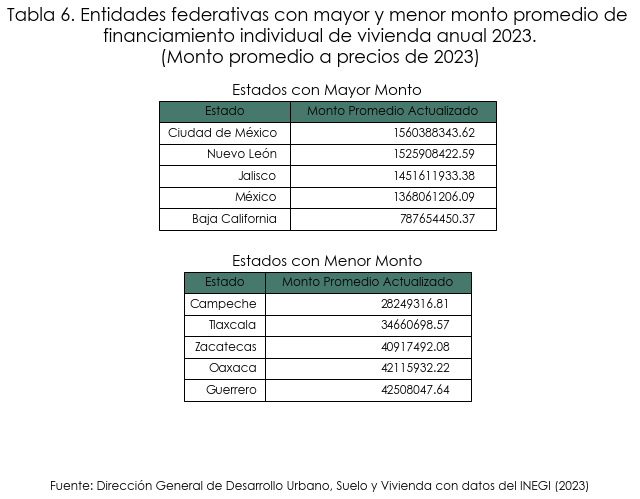

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Fuente de los textos
fuente = "Century Gothic"

# Crear la figura y los ejes con un tamaño más grande
fig, axs = plt.subplots(2, 1, figsize=(8, 5))  # Aumenta el tamaño de la figura

# Títulos de las tablas
titulo_general = "Tabla 6. Entidades federativas con mayor y menor monto promedio de \n financiamiento individual de vivienda anual 2023. \n(Monto promedio a precios de 2023)"
titulo_tabla_monto_alto = "Estados con Mayor Monto"
titulo_tabla_monto_bajo = "Estados con Menor Monto"

# Definir color de la tabla
colors = ['#235b4eff', '#D3EEE1']  # Gris claro a blanco
cm = LinearSegmentedColormap.from_list('custom', colors, N=6)

# Tabla para los 5 estados con el monto promedio actualizado más alto
tabla_monto_alto = axs[0].table(cellText=top_5_estados_monto_alto_df.values,
                                 colLabels=top_5_estados_monto_alto_df.columns,
                                 loc='center', colColours=[cm(0.30), cm(0.30)])


tabla_monto_alto.auto_set_font_size(False)  # Desactiva el ajuste automático del tamaño de la fuente
tabla_monto_alto.set_fontsize(12)  # Aumenta el tamaño de la fuente
tabla_monto_alto.auto_set_column_width(col=list(range(len(top_5_estados_monto_alto_df.columns))))
tabla_monto_alto.scale(1, 2.2)  # Aumenta el tamaño de la tabla

# Agregar título sobre la tabla
axs[0].set_title(titulo_tabla_monto_alto, fontsize=15, fontname=fuente, pad=20)  # Utiliza pad para ajustar la distancia entre el título y la tabla

# Tabla para los 5 estados con el monto promedio actualizado más bajo
tabla_monto_bajo = axs[1].table(cellText=top_5_estados_monto_bajo_df.values,
                                 colLabels=top_5_estados_monto_bajo_df.columns,
                                 loc='center', colColours=[cm(0.30), cm(0.30)])


tabla_monto_bajo.auto_set_font_size(False)  # Desactiva el ajuste automático del tamaño de la fuente
tabla_monto_bajo.set_fontsize(12)  # Aumenta el tamaño de la fuente
tabla_monto_bajo.auto_set_column_width(col=list(range(len(top_5_estados_monto_bajo_df.columns))))
tabla_monto_bajo.scale(1, 2.2)  # Aumenta el tamaño de la tabla

# Agregar título sobre la tabla
axs[1].set_title(titulo_tabla_monto_bajo, fontsize=15, fontname=fuente, pad=20)  # Utiliza pad para ajustar la distancia entre el título y la tabla

# Ajustar el espacio entre los títulos de las tablas
plt.subplots_adjust(hspace=0.7)

# Agregar la fuente debajo de la segunda tabla
plt.text(0.5, -0.15, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del INEGI (2023)',
         horizontalalignment='center', verticalalignment='center', transform=fig.transFigure, fontsize=12, fontname=fuente)

# Ocultar los ejes
for ax in axs:
    ax.axis('off')

# Agregar título general
plt.suptitle(titulo_general, fontsize=18, fontname=fuente, y=1.18)  # Ajusta la posición vertical del título general

# Guardar la imagen
plt.savefig('top_5_estados_monto_actualizado.png', bbox_inches='tight')

# Mostrar la imagen
plt.show()

- Figura 5. Variación porcentual del monto de financiamiento de vivienda anual, por entidad federativa.

In [123]:
# Filtrar el DataFrame para excluir 'No distribuido en Estado
df4 = df4[(df4['estado'] != 'No distribuido')]

# Crear una tabla pivote con los nombres de los estados como índice y las acciones para los años 2022 y 2023 como columnas
finmon = df4.pivot_table(index='estado', columns='año', values='monto', aggfunc='sum').reset_index()

# Renombrar las columnas para que coincidan con las especificaciones
finmon.rename(columns={2022: 'montos 2022', 2023: 'montos 2023'}, inplace=True)

# Ordenar el DataFrame por el nombre del estado
finmon.sort_values(by='estado', inplace=True)

# Reiniciar los índices
finmon.reset_index(drop=True, inplace=True)

In [124]:
#Crear una columna con la variación porcentual 'Variación (%)
finmon['variación (%)'] = ((finmon['montos 2023'] - finmon['montos 2022']) / finmon['montos 2022']) * 100
finmon

año,estado,montos 2022,montos 2023,variación (%)
0,Aguascalientes,8942047154.01,9397462059.17,5.09
1,Baja California,18986008799.86,21291554807.64,12.14
2,Baja California Sur,4686340933.55,5080843332.80,8.42
3,Campeche,2151416010.70,2234591638.87,3.87
4,Chiapas,5901116782.17,7358580417.94,24.70
5,Chihuahua,20801199384.64,22109842276.91,6.29
6,Ciudad de México,68307659860.40,55330531125.63,-19.00
7,Coahuila de Zaragoza,17477516590.70,18773140567.65,7.41
8,Colima,3631905321.17,4104562906.90,13.01
9,Durango,4892253330.32,6015042782.31,22.95


In [125]:
# Calculamos el valor más bajo y más alto de la variación porcentual
min = finmon['variación (%)'].min()
max = finmon['variación (%)'].max()

# Imprimimos los valores mínimo y máximo
print("Valor más bajo de la variación porcentual:", min)
print("Valor más alto de la variación porcentual:", max)

Valor más bajo de la variación porcentual: -18.998057847812355
Valor más alto de la variación porcentual: 24.698098505225996


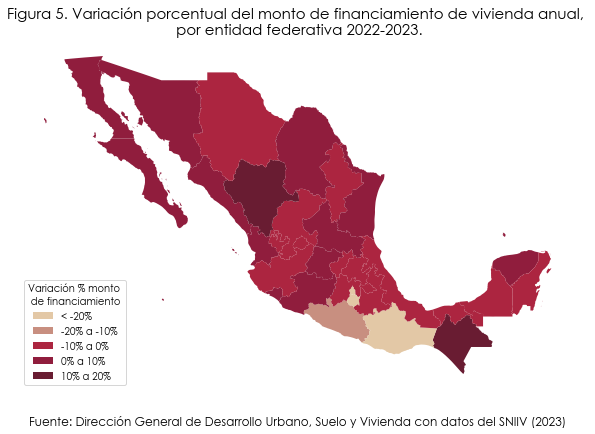

In [126]:
# Fusionar el DataFrame finmon con el GeoDataFrame del mapa de estados
finmon_geo = estados.merge(finmon, how='inner', left_on='state_name', right_on='estado')

# Definir paleta de colores para la variación porcentual
paleta_variacion = ["#e3c8a6ff", "#c88f80ff", "#ac2540ff", "#901d3dff", "#691c32ff"]

# Definir límites de los rangos de variación porcentual
rangos = [-np.inf, -20, -10, 0, 10, 20, np.inf]

# Definir etiquetas de los rangos
etiquetas = ["< -20%", "-20% a -10%", "-10% a 0%", "0% a 10%", "10% a 20%", "> 20%"]

# Crear leyenda personalizada para la variación porcentual
leyenda_variacion = [Patch(facecolor=paleta_variacion[i], label=etiquetas[i]) for i in range(len(paleta_variacion))]

# Convertir lista de colores a un objeto de paleta de colores para la variación porcentual
cmap_variacion = ListedColormap(paleta_variacion)

# Visualizar mapa de variación porcentual de acciones de financiamiento
fig, ax = plt.subplots(figsize=(10, 10))
finmon_geo.plot(ax=ax, column='variación (%)', cmap=cmap_variacion, legend=False, linewidth=0.0, edgecolor='None')
plt.title('Figura 5. Variación porcentual del monto de financiamiento de vivienda anual, \n por entidad federativa 2022-2023.', fontdict={'fontsize': 15})
plt.text(0.5, -0.1, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)', ha='center', transform=ax.transAxes, fontsize=12)
plt.axis('off')  # Quitar el marco del mapa
plt.legend(handles=leyenda_variacion, title='Variación % monto \n de financiamiento', loc='lower left', fontsize=10)  # Ubicar la leyenda en el lado izquierdo
plt.show()

- Tabla 7. Entidades federativas con mayor y menor variación porcentual en el monto total de financiamiento de vivienda anual 2023. 

In [315]:
# Ordenar el DataFrame por la columna 'acciones'
df3_m = df3.sort_values(by='monto', ascending=False)

In [316]:
# Obtener los 5 estados con la mayor cantidad de monto de financiamiento
estados_mas_monto = df3_m.head(5)
estados_mas_monto

,año,estado,acciones,monto
19,2023,Nuevo León,66868,57074506519.26
9,2023,Ciudad de México,57140,55330531125.63
14,2023,Jalisco,61102,49560457363.79
15,2023,México,75995,43137499476.44
22,2023,Querétaro,21497,23443216085.75


In [317]:
# Obtener los 5 estados con la menor cantidad de monto de financiamiento
estados_menos_monto = df3_m.tail(5)
estados_menos_monto

,año,estado,acciones,monto
6,2023,Colima,6239,4104562906.90
20,2023,Oaxaca,9228,2757934708.13
32,2023,Zacatecas,4427,2505536925.22
4,2023,Campeche,7611,2234591638.87
29,2023,Tlaxcala,4288,1960190800.68


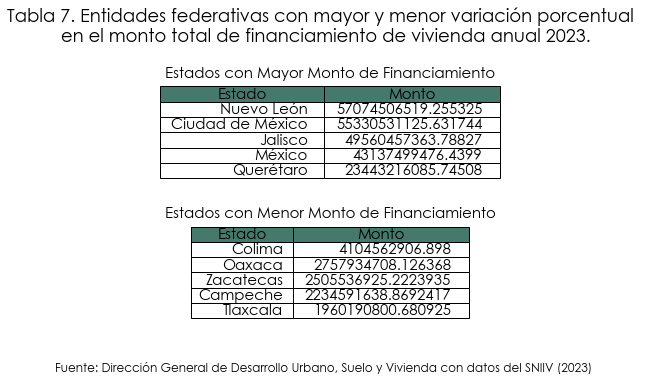

In [319]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Fuente de los textos
fuente = "Century Gothic"

# Crear la figura y los ejes con un tamaño más grande
fig, axs = plt.subplots(2, 1, figsize=(8, 3.5))  # Aumenta el tamaño de la figura

# Títulos de las tablas
titulo_general = "Tabla 7. Entidades federativas con mayor y menor variación porcentual \n en el monto total de financiamiento de vivienda anual 2023."
titulo_tabla_mas_monto = "Estados con Mayor Monto de Financiamiento"
titulo_tabla_menos_monto = "Estados con Menor Monto de Financiamiento"

# Definir color de la tabla
colors = ['#235b4eff', '#D3EEE1']  # Gris claro a blanco
cm = LinearSegmentedColormap.from_list('custom', colors, N=6)

# Tabla para los 5 estados con la mayor cantidad de monto de financiamiento
tabla_mas_monto = axs[0].table(cellText=estados_mas_monto[['estado', 'monto']].values,
                                  colLabels=['Estado', 'Monto'],
                                  loc='center', colColours=[cm(0.30), cm(0.30)])


tabla_mas_monto.auto_set_font_size(False)  # Desactiva el ajuste automático del tamaño de la fuente
tabla_mas_monto.set_fontsize(15)  # Aumenta el tamaño de la fuente
tabla_mas_monto.auto_set_column_width(col=list(range(len(estados_mas_monto.columns))))
tabla_mas_monto.scale(1, 2.2)  # Aumenta el tamaño de la tabla

# Agregar título sobre la tabla
axs[0].set_title(titulo_tabla_mas_monto, fontsize=15, fontname=fuente, pad=30)  # Utiliza pad para ajustar la distancia entre el título y la tabla

# Tabla para los 5 estados con la menor cantidad de monto de financiamiento
tabla_menos_monto = axs[1].table(cellText=estados_menos_monto[['estado', 'monto']].values,
                                    colLabels=['Estado', 'Monto'],
                                    loc='center', colColours=[cm(0.30), cm(0.30)])


tabla_menos_monto.auto_set_font_size(False)  # Desactiva el ajuste automático del tamaño de la fuente
tabla_menos_monto.set_fontsize(15)  # Aumenta el tamaño de la fuente
tabla_menos_monto.auto_set_column_width(col=list(range(len(estados_menos_monto.columns))))
tabla_menos_monto.scale(1, 2.2)  # Aumenta el tamaño de la tabla

# Agregar título sobre la tabla
axs[1].set_title(titulo_tabla_menos_monto, fontsize=15, fontname=fuente, pad=30)  # Utiliza pad para ajustar la distancia entre el título y la tabla

# Ajustar el espacio entre los títulos de las tablas
plt.subplots_adjust(hspace=1.8)

# Agregar la fuente debajo de la segunda tabla
plt.text(0.5, -0.15, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)',
         horizontalalignment='center', verticalalignment='center', transform=fig.transFigure, fontsize=12, fontname=fuente)

# Ocultar los ejes
for ax in axs:
  ax.axis('off')

# Agregar título general
plt.suptitle(titulo_general, fontsize=18, fontname=fuente, y=1.28)  # Ajusta la posición vertical del título general

# Guardar la imagen
plt.savefig('top_5_estados_montos.png', bbox_inches='tight')

# Mostrar la imagen
plt.show()

## 3) PROGRAMAS SOCIALES DEL RAMO 15 CON INFORMACIÓN DISPONIBLE EN EL SNIIV	

#### Estadísticas Generales
- Tabla 8. Tabla comparativa de los subsidios otorgados por mes 2023  (en acciones)

In [320]:
# Obtención de los datos
url_sco = "https://sniiv.sedatu.gob.mx/api/CuboAPI/GetCONAVI/2023,2023/00/0/anio,mes,programa_presupuestal"
r = requests.get(url_sco)

# Crear DataFrame a partir de los datos JSON
df_sco = pd.DataFrame(r.json())
df_sco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   año                    41 non-null     int64  
 1   mes                    41 non-null     object 
 2   programa_presupuestal  41 non-null     object 
 3   acciones               41 non-null     int64  
 4   monto                  41 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.7+ KB


In [321]:
df_sco.head(2)

,año,mes,programa_presupuestal,acciones,monto
0,2023,enero,Programa de Vivienda Social (Cofinanciamiento),0,3417.81
1,2023,febrero,Programa de Vivienda Social (Cofinanciamiento),0,3417.81


In [323]:
# Crear DataFrame con pivot_table para montos
df_montos = df_sco.pivot_table(index='mes', columns='programa_presupuestal', values='monto', aggfunc='sum')
df_montos

# Reordenar los meses de enero a diciembre
meses_ordenados = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
df_montos = df_montos.reindex(meses_ordenados)

# Rellenar valores NaN con ceros
df_montos = df_montos.fillna(0)

# Calcular el total por mes
df_montos['Total por Mes'] = df_montos.sum(axis=1)

# Calcular el total por programa presupuestal
df_montos.loc['Total por Programa Presupuestal'] = df_montos.sum()

import locale

# Establecer la configuración regional para México
locale.setlocale(locale.LC_ALL, 'es_MX.UTF-8')

# Formatear las cifras como moneda mexicana
df_montos = df_montos.applymap(lambda x: locale.currency(x, grouping=True) if pd.notnull(x) else 0)
df_montos

programa_presupuestal,Programa Nacional de Reconstrucción,Programa de Vivienda Social (Cofinanciamiento),Programa de Vivienda Social (PMV),Programa de Vivienda Social (Subsidio 100% CONAVI),Total por Mes
mes,,,,,
enero,$0.00,"$3,417.81",$0.00,$0.00,"$3,417.81"
febrero,"$240,578,402.06","$3,417.81",$0.00,"$337,737,623.29","$578,319,443.16"
marzo,"$180,182,784.31","$3,417.81","$500,135,000.00",$0.00,"$680,321,202.12"
abril,"$79,904,000.00","$3,417.81","$805,000.00","$458,256,762.81","$538,969,180.62"
mayo,"$14,425,000.00","$3,417.81","$206,390,000.00","$176,644,275.16","$397,462,692.97"
junio,"$9,801,000.00","$3,417.81","$1,201,145,000.00","$366,732,491.32","$1,577,681,909.13"
julio,"$31,858,677.72","$3,417.81","$79,290,000.00","$98,149,116.96","$209,301,212.49"
agosto,"$1,068,493.36","$3,417.81","$15,925,000.00","$149,661,832.00","$166,658,743.17"
septiembre,"$3,354,739.19","$3,417.81","$9,610,000.00","$343,290,274.06","$356,258,431.06"


In [324]:
df_montos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, enero to Total por Programa Presupuestal
Data columns (total 5 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Programa Nacional de Reconstrucción                 13 non-null     object
 1   Programa de Vivienda Social (Cofinanciamiento)      13 non-null     object
 2   Programa de Vivienda Social (PMV)                   13 non-null     object
 3   Programa de Vivienda Social (Subsidio 100% CONAVI)  13 non-null     object
 4   Total por Mes                                       13 non-null     object
dtypes: object(5)
memory usage: 624.0+ bytes


- Tabla 9. Tabla comparativa de los subsidios otorgados por mes 2023 (en pesos)

In [325]:
# Crear DataFrame con pivot_table para acciones
df_acciones = df_sco.pivot_table(index='mes', columns='programa_presupuestal', values='acciones', aggfunc='sum')
df_acciones

# Reordenar los meses de enero a diciembre
meses_ordenados = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
df_acciones = df_acciones.reindex(meses_ordenados)

# Rellenar valores NaN con ceros
df_acciones = df_acciones.fillna(0)

# Calcular el total por mes
df_acciones['Total por Mes'] = df_acciones.sum(axis=1)

# Calcular el total por programa presupuestal
df_acciones.loc['Total por Programa Presupuestal'] = df_acciones.sum()

import locale

# Establecer la configuración regional para México
locale.setlocale(locale.LC_ALL, 'es_MX.UTF-8')

# Formatear las cifras como números con comas cada tres dígitos
df_acciones_formatted = df_acciones.applymap(lambda x: locale.format_string('%d', x, grouping=True) if isinstance(x, (int, float)) else x)

df_acciones_formatted


programa_presupuestal,Programa Nacional de Reconstrucción,Programa de Vivienda Social (Cofinanciamiento),Programa de Vivienda Social (PMV),Programa de Vivienda Social (Subsidio 100% CONAVI),Total por Mes
mes,,,,,
enero,0,0,0,0,0
febrero,"1,077",0,0,"1,360","2,437"
marzo,675,0,"14,035",0,"14,710"
abril,309,0,23,"2,189","2,521"
mayo,63,0,"5,889",751,"6,703"
junio,43,0,"34,111",931,"35,085"
julio,36,0,"2,256",416,"2,708"
agosto,6,0,455,760,"1,221"
septiembre,7,0,273,"1,031","1,311"


- Gráfica 13. Total de subsidios para vivienda otorgados por el ramo 15, según programa y edad, 2023 (porcentaje)

In [218]:
# Obtención de los datos
url_sco1 = "https://sniiv.sedatu.gob.mx/api/CuboAPI/GetCONAVI/2023,2023/00/0/anio,rango_edad,programa_presupuestal"
r = requests.get(url_sco1)

# Crear DataFrame a partir de los datos JSON
df_sco1 = pd.DataFrame(r.json())
df_sco1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   año                    12 non-null     int64  
 1   grupo_edad             12 non-null     object 
 2   programa_presupuestal  12 non-null     object 
 3   acciones               12 non-null     int64  
 4   monto                  12 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 612.0+ bytes


In [241]:
df_sco1.head()

,año,grupo_edad,programa_presupuestal,acciones,monto
0,2023,29 o menos,Programa de Vivienda Social (Cofinanciamiento),224,4162165.10
1,2023,29 o menos,Programa Nacional de Reconstrucción,159,40486390.26
2,2023,29 o menos,Programa de Vivienda Social (Subsidio 100% CON...,1482,405141099.82
3,2023,29 o menos,Programa de Vivienda Social (PMV),5580,196895000.00
4,2023,30 a 59,Programa de Vivienda Social (Cofinanciamiento),862,17493027.10


In [275]:
# Usamos pivot_table para pivotar los datos
sconavi = pd.pivot_table(df_sco1, values='acciones', index='grupo_edad', columns='programa_presupuestal')
sconavi


programa_presupuestal,Programa Nacional de Reconstrucción,Programa de Vivienda Social (Cofinanciamiento),Programa de Vivienda Social (PMV),Programa de Vivienda Social (Subsidio 100% CONAVI)
grupo_edad,,,,
29 o menos,159,224,5580,1482
30 a 59,1284,862,35464,6275
60 o más,897,31,16040,2627


In [298]:
# Suma total de acciones por programa presupuestal
total_acciones_programa = df_sco1.groupby('programa_presupuestal')['acciones'].sum()

# Calcula los porcentajes de cada grupo de edad para cada programa presupuestal
porcentaje_acciones_programa = df_sco1.groupby(['programa_presupuestal', 'grupo_edad'])['acciones'].apply(lambda x: x / total_acciones_programa[x.name[0]] * 100)
porcentaje_acciones_programa


programa_presupuestal                               grupo_edad    
Programa Nacional de Reconstrucción                 29 o menos  1     6.79
                                                    30 a 59     5    54.87
                                                    60 o más    9    38.33
Programa de Vivienda Social (Cofinanciamiento)      29 o menos  0    20.05
                                                    30 a 59     4    77.17
                                                    60 o más    8     2.78
Programa de Vivienda Social (PMV)                   29 o menos  3     9.78
                                                    30 a 59     7    62.13
                                                    60 o más    11   28.10
Programa de Vivienda Social (Subsidio 100% CONAVI)  29 o menos  2    14.27
                                                    30 a 59     6    60.43
                                                    60 o más    10   25.30
Name: acciones, dtype: float64

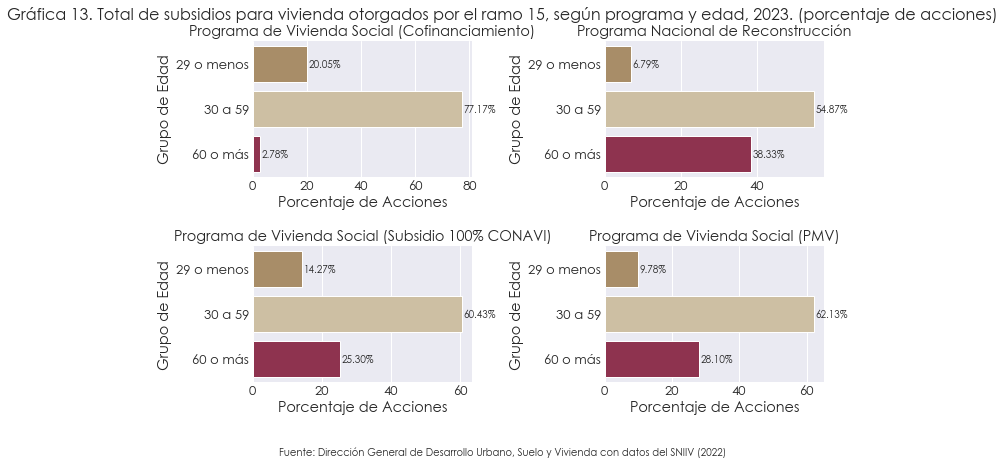

In [443]:
import matplotlib.pyplot as plt
import seaborn as sns

# Colores personalizados
colores = ['#b38e5d', '#d4c19c', '#9d2449']

# Definir una función para calcular el porcentaje de destino de crédito para un programa presupuestal dado
def calcular_porcentaje_destino_credito(df, programa_presupuestal):
    programa_df = df[df["programa_presupuestal"] == programa_presupuestal]
    total_acciones = programa_df["acciones"].sum()
    porcentaje_destino_credito = programa_df.groupby("grupo_edad")["acciones"].sum() / total_acciones * 100
    return porcentaje_destino_credito

# Lista de programas presupuestales
programas_presupuestales = df_sco1["programa_presupuestal"].unique()

# Crear gráficos de barras horizontales en una sola imagen
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
fig.suptitle('Gráfica 13. Total de subsidios para vivienda otorgados por el ramo 15, según programa y edad, 2023. (porcentaje de acciones) ', fontsize=16)

# Iterar sobre cada programa presupuestal y crear gráficos de barras
for idx, programa in enumerate(programas_presupuestales):
    porcentajes = calcular_porcentaje_destino_credito(df_sco1, programa)
    ax = axs[idx // 2][idx % 2]
    sns.barplot(y=porcentajes.index, x=porcentajes.values, ax=ax, palette=colores)
    ax.set_title(programa)
    ax.set_xlabel('Porcentaje de Acciones')
    ax.set_ylabel('Grupo de Edad')
    
    # Etiquetas en las barras con dos decimales
    for i, p in enumerate(ax.patches):
        percentage = porcentajes.values[i]
        ax.text(p.get_width() + 0.5, p.get_y() + p.get_height() / 2, f'{percentage:.2f}%', ha='left', va='center', fontsize=10)

    # Ajustes en los contornos
    sns.despine(ax=ax, right=True, top=True)

# Ajuste de espaciado
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Añadir fuente
plt.figtext(0.5, -0.06, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2022)' , ha='center', fontsize=10)

# Mostrar la gráfica
plt.show()


- Gráfica 14. Subsidios para vivienda otorgados por el ramo 15, según programa y sexo, 2023 (porcentaje)	

In [276]:
# Obtención de los datos
url_sco2 = "https://sniiv.sedatu.gob.mx/api/CuboAPI/GetCONAVI/2023,2023/00/0/anio,genero,programa_presupuestal"
r = requests.get(url_sco2)

# Crear DataFrame a partir de los datos JSON
df_sco2 = pd.DataFrame(r.json())
df_sco2.head()

,año,sexo,programa_presupuestal,acciones,monto
0,2023,Hombre,Programa de Vivienda Social (Cofinanciamiento),604,11608781.21
1,2023,Hombre,Programa Nacional de Reconstrucción,1071,326557911.17
2,2023,Hombre,Programa de Vivienda Social (Subsidio 100% CON...,3943,1117193650.77
3,2023,Hombre,Programa de Vivienda Social (PMV),18926,668295000.00
4,2023,Mujer,Programa de Vivienda Social (Cofinanciamiento),513,11573744.87


In [280]:
# Usamos pivot_table para pivotar los datos
sconagen = pd.pivot_table(df_sco2, values='acciones', index='sexo', columns='programa_presupuestal')
sconagen

programa_presupuestal,Programa Nacional de Reconstrucción,Programa de Vivienda Social (Cofinanciamiento),Programa de Vivienda Social (PMV),Programa de Vivienda Social (Subsidio 100% CONAVI)
sexo,,,,
Hombre,1071,604,18926,3943
Mujer,1269,513,38158,6441


In [283]:
# Suma total de acciones por programa presupuestal
total_acciones_programa = df_sco2.groupby('programa_presupuestal')['acciones'].sum()

# Calcula los porcentajes de cada grupo de edad para cada programa presupuestal
porcentaje_acciones_programa = df_sco2.groupby(['programa_presupuestal', 'sexo'])['acciones'].apply(lambda x: x / total_acciones_programa[x.name[0]] * 100)
porcentaje_acciones_programa

programa_presupuestal                               sexo     
Programa Nacional de Reconstrucción                 Hombre  1   45.77
                                                    Mujer   5   54.23
Programa de Vivienda Social (Cofinanciamiento)      Hombre  0   54.07
                                                    Mujer   4   45.93
Programa de Vivienda Social (PMV)                   Hombre  3   33.15
                                                    Mujer   7   66.85
Programa de Vivienda Social (Subsidio 100% CONAVI)  Hombre  2   37.97
                                                    Mujer   6   62.03
Name: acciones, dtype: float64

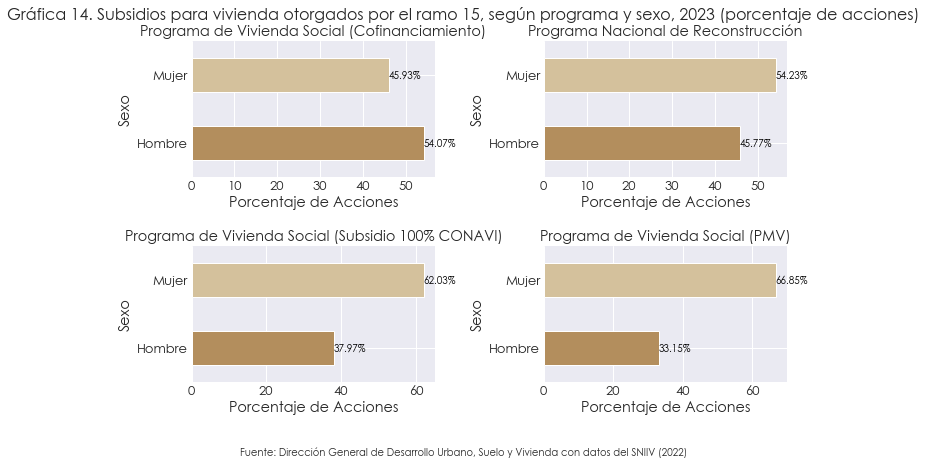

In [442]:
import matplotlib.pyplot as plt
import seaborn as sns

# Colores personalizados
colores = ['#b38e5d', '#d4c19c']

# Definir una función para calcular el porcentaje de acciones por sexo para un programa presupuestal dado
def calcular_porcentaje_acciones_sexo(df, programa_presupuestal):
    programa_df = df[df["programa_presupuestal"] == programa_presupuestal]
    total_acciones = programa_df["acciones"].sum()
    porcentaje_acciones_sexo = programa_df.groupby("sexo")["acciones"].sum() / total_acciones * 100
    return porcentaje_acciones_sexo

# Lista de programas presupuestales
programas_presupuestales = df_sco2["programa_presupuestal"].unique()

# Crear gráficos de barras horizontales en una sola imagen
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
fig.suptitle('Gráfica 14. Subsidios para vivienda otorgados por el ramo 15, según programa y sexo, 2023 (porcentaje de acciones)', fontsize=16)

# Iterar sobre cada programa presupuestal y crear gráficos de barras
for idx, programa in enumerate(programas_presupuestales):
    porcentajes = calcular_porcentaje_acciones_sexo(df_sco2, programa)
    ax = axs[idx // 2][idx % 2]
    porcentajes.plot(kind="barh", ax=ax, color=colores)
    ax.set_title(programa)
    ax.set_xlabel('Porcentaje de Acciones')
    ax.set_ylabel('Sexo')
    
    # Ajustes en los contornos
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    
    # Etiquetas en las barras con dos decimales
    for bar in ax.patches:
        bar_value = bar.get_width()
        text = f'{bar_value:.2f}%'
        text_x = bar.get_width()
        text_y = bar.get_y() + bar.get_height() / 2
        ax.text(text_x, text_y, text, ha='left', va='center', color="black", fontsize=10)

# Ajuste de espaciado
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Añadir fuente
plt.figtext(0.5, -0.06, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2022)' , ha='center', fontsize=10)

# Mostrar la gráfica
plt.show()


- Gráfica 15. Total de acciones otorgadas mediante el PRAH, mensual  2023.	

In [364]:
# Obtención de los datos
url_PRAH = "https://sniiv.sedatu.gob.mx/api/CuboAPI/GetInsus/2023,2023/0/0/mes"
r = requests.get(url_PRAH)

# Crear DataFrame a partir de los datos JSON
df_PRAH = pd.DataFrame(r.json())
df_PRAH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   año       12 non-null     int64  
 1   mes       12 non-null     object 
 2   acciones  12 non-null     int64  
 3   monto     12 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 516.0+ bytes


In [365]:
df_PRAH

,año,mes,acciones,monto
0,0,enero,97,1309500.00
1,0,febrero,200,2700000.00
2,0,marzo,300,4050000.00
3,0,abril,300,4050000.00
4,0,mayo,500,6750000.00
5,0,junio,267,3600000.00
6,0,julio,439,5926500.00
7,0,agosto,561,7573500.00
8,0,septiembre,381,5143500.00
9,0,octubre,1205,16259345.49


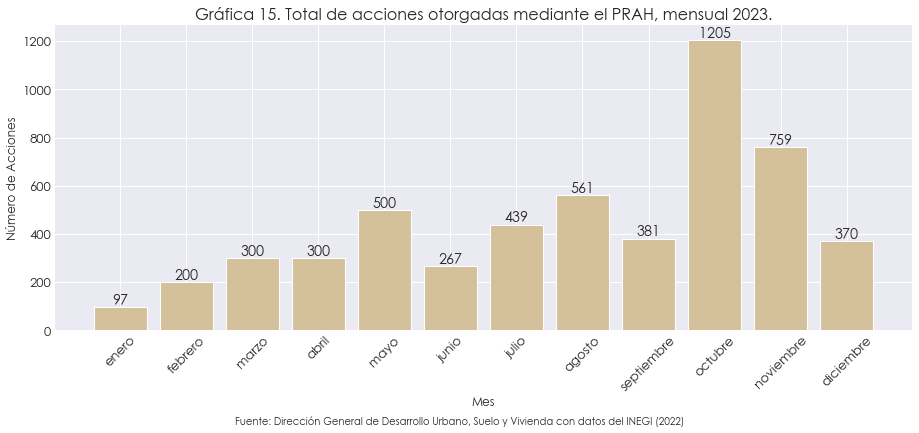

In [386]:
import matplotlib.pyplot as plt
import pandas as pd

# Datos del DataFrame
meses = df_PRAH['mes']
acciones = df_PRAH['acciones']

# Definir colores
color_barras = '#d4c19c'

# Crear la gráfica de barras
plt.figure(figsize=(13, 6))
bar_plot = plt.bar(meses, acciones, color=color_barras)

# Añadir título y etiquetas
plt.title('Gráfica 15. Total de acciones otorgadas mediante el PRAH, mensual 2023.', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de Acciones', fontsize=12)

# Añadir fuente al pie de la gráfica
plt.figtext(0.5, -0.002, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del INEGI (2022)', ha='center', fontsize=10)

# Mostrar la cantidad encima de cada barra
for bar, accion in zip(bar_plot, acciones):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(accion), ha='center', va='bottom')

# Mostrar la gráfica
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()


- Gráfica 16. Monto total de apoyos otorgados mediante el PRAH mensual 2023 (en pesos)	

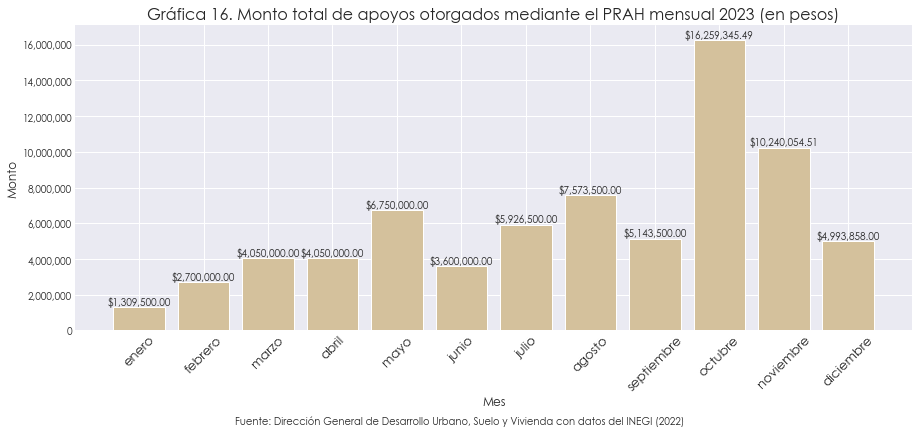

In [387]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

# Datos del DataFrame
meses = df_PRAH['mes']
monto = df_PRAH['monto']

# Definir colores
color_barras = '#d4c19c'

# Crear la gráfica de barras
plt.figure(figsize=(13, 6))
bar_plot = plt.bar(meses, monto, color=color_barras)

# Añadir título y etiquetas
plt.title('Gráfica 16. Monto total de apoyos otorgados mediante el PRAH mensual 2023 (en pesos)', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Monto', fontsize=12)

# Añadir fuente al pie de la gráfica
plt.figtext(0.5, -0.002, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del INEGI (2022)', ha='center', fontsize=10)

# Formatear cifras con separador de miles (coma) en el eje y y las etiquetas de las cifras
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().tick_params(axis='y', labelsize=10)  # Tamaño de las etiquetas en el eje y

# Mostrar el monto encima de cada barra con formato de cifras
for bar, m in zip(bar_plot, monto):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'${m:,.2f}', ha='center', va='bottom', fontsize=10)

# Mostrar la gráfica
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()



## 4) OFERTA DE VIVIENDA


#### Perímetros de contención urbana y valor de la vivienda	
- Gráfica 17. Registro de vivienda según su Perímetro de Contención Urbana y el valor de la vivienda 2023 (porcentaje)

In [453]:
# Obtención de los datos
url_ruv = "https://sniiv.sedatu.gob.mx/api/CuboAPI/GetRegistro/2023,2023/0/0/pcu,segmento"
r = requests.get(url_ruv)

# Crear DataFrame a partir de los datos JSON
df_ruv = pd.DataFrame(r.json())
df_ruv.info()
df_ruv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   año        16 non-null     int64 
 1   pcu        16 non-null     object
 2   segmento   16 non-null     object
 3   viviendas  16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 644.0+ bytes


,año,pcu,segmento,viviendas
0,0,U1,Media residencial,2800
1,0,U1,Popular hasta 158,5684
2,0,U1,Popular hasta 200,1778
3,0,U1,tradicional,3076
4,0,U2,Media residencial,1868
5,0,U2,Popular hasta 158,19978
6,0,U2,Popular hasta 200,2491
7,0,U2,tradicional,6032
8,0,U3,Media residencial,3736
9,0,U3,Popular hasta 158,56665


In [454]:
# Usamos pivot_table para pivotar los datos
ruv_reg = pd.pivot_table(df_ruv, values='viviendas', index='segmento', columns='pcu', fill_value=0)
ruv_reg

pcu,FC,U1,U2,U3
segmento,,,,
Media residencial,2073,2800,1868,3736
Popular hasta 158,26871,5684,19978,56665
Popular hasta 200,3019,1778,2491,8749
tradicional,5500,3076,6032,12392


In [463]:
# Calcula la suma de cada columna (pcu)
sum_por_pcu = ruv_reg.sum(axis=0)

# Divide cada valor de la tabla pivoteada por la suma correspondiente a su columna (pcu)
porcentaje_segmento_por_pcu = ruv_reg.divide(sum_por_pcu, axis=1) * 100

# Redondea los valores a dos decimales
porcentaje_segmento_por_pcu = porcentaje_segmento_por_pcu.round(2)
porcentaje_segmento_por_pcu.info()
porcentaje_segmento_por_pcu


<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Media residencial to tradicional
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FC      4 non-null      float64
 1   U1      4 non-null      float64
 2   U2      4 non-null      float64
 3   U3      4 non-null      float64
dtypes: float64(4)
memory usage: 332.0+ bytes


pcu,FC,U1,U2,U3
segmento,,,,
Media residencial,5.53,20.99,6.15,4.58
Popular hasta 158,71.73,42.62,65.78,69.49
Popular hasta 200,8.06,13.33,8.20,10.73
tradicional,14.68,23.06,19.86,15.20


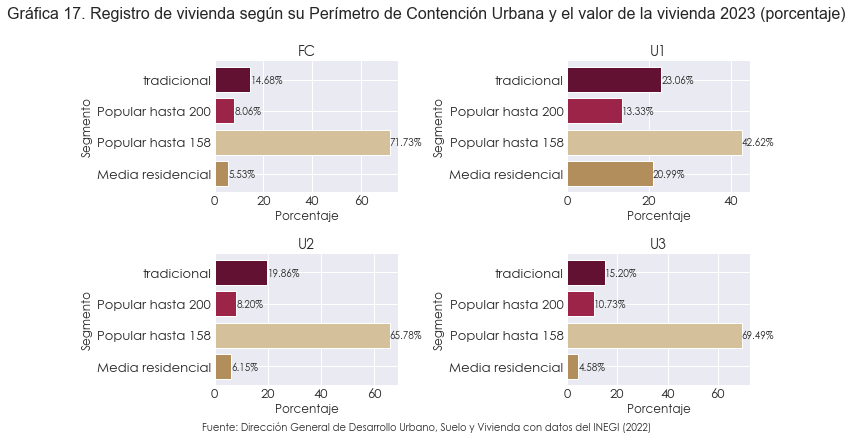

In [465]:
import matplotlib.pyplot as plt
import pandas as pd

# Colores personalizados
colores = ['#b38e5d', '#d4c19c', '#9d2449', '#621132']

# Definir los segmentos y las columnas
segmentos = porcentaje_segmento_por_pcu.index
columnas = porcentaje_segmento_por_pcu.columns

# Crear la figura y los subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Iterar sobre cada columna y graficar
for i, (col, ax) in enumerate(zip(columnas, axs.flatten())):
    for seg, color in zip(segmentos, colores):
        ax.barh(seg, porcentaje_segmento_por_pcu.loc[seg, col], color=color)
        ax.text(porcentaje_segmento_por_pcu.loc[seg, col], seg, f"{porcentaje_segmento_por_pcu.loc[seg, col]:.2f}%", va='center', ha='left', fontsize=10)
    
    # Añadir título y etiquetas
    ax.set_title(col, fontsize=14)
    ax.set_xlabel('Porcentaje', fontsize=12)
    ax.set_ylabel('Segmento', fontsize=12)
    ax.tick_params(axis='y')

# Título general
fig.suptitle('Gráfica 17. Registro de vivienda según su Perímetro de Contención Urbana y el valor de la vivienda 2023 (porcentaje)', fontsize=16, fontname='Arial')
# Añadir fuente al pie de la gráfica
plt.figtext(0.5, -0.002, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del INEGI (2022)', ha='center', fontsize=10)

# Ajustar diseño y mostrar la gráfica
plt.tight_layout()
plt.show()


#### Registro de Viviendas	
- Figura 6. Registro de viviendas acumuladas según entidad federativa 2023

In [342]:
# Obtención de los datos
url_ruv = "https://sniiv.sedatu.gob.mx/api/CuboAPI/GetRegistro/2022,2022/00/0/estado,mes"
r = requests.get(url_ruv)

# Crear DataFrame a partir de los datos JSON
df_ruv = pd.DataFrame(r.json())

In [343]:
# Usamos pivot_table para pivotar los datos
ruv_reg = pd.pivot_table(df_ruv, values='viviendas', index='estado', columns='mes', fill_value=0)
ruv_reg

# Calcular la suma total de viviendas por mes para cada estado
ruv_reg['Total'] = ruv_reg.sum(axis=1)
ruv_reg

mes,abril,agosto,diciembre,enero,febrero,julio,junio,marzo,mayo,noviembre,octubre,septiembre,Total
estado,,,,,,,,,,,,,
Aguascalientes,754,45,211,357,273,258,522,410,547,593,721,85,4776
Baja California,501,293,40,962,228,452,151,100,384,272,286,1009,4678
Baja California Sur,79,207,50,171,70,126,20,21,6,36,9,15,810
Campeche,0,6,0,0,17,47,63,8,0,0,0,1,142
Chiapas,48,33,35,48,231,78,210,87,92,26,94,107,1089
Chihuahua,496,357,45,273,86,896,469,178,128,386,161,265,3740
Ciudad de México,353,379,144,633,27,374,384,61,375,531,439,224,3924
Coahuila de Zaragoza,1029,876,143,132,213,276,805,455,294,1069,319,330,5941
Colima,150,80,211,35,226,124,218,208,84,78,60,238,1712


In [344]:
# Filtrar las columnas 'estado' y 'Total' solamente
ruv_reg = ruv_reg[['Total']]
ruv_reg

# Fusionar GeoDataFrame de estados con DataFrame de acciones de financiamiento
edo = estados.merge(ruv_reg, left_on='state_name', right_on='estado', how='inner')

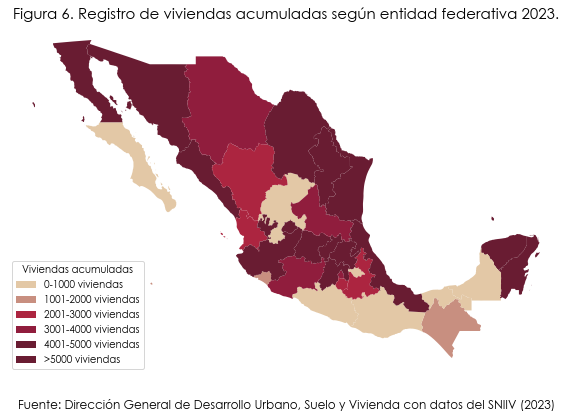

In [345]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch  
from matplotlib.colors import ListedColormap, BoundaryNorm

# Definir los límites de los rangos de viviendas acumuladas
limites_rangos = [0, 1000, 2000, 3000, 4000, 5000, float('inf')]

# Definir los colores para cada rango
paleta = ["#e3c8a6ff", "#c88f80ff", "#ac2540ff", "#901d3dff", "#691c32ff", "#691c32ff"]
niveles = ["0-1000 viviendas", "1001-2000 viviendas", "2001-3000 viviendas", "3001-4000 viviendas", "4001-5000 viviendas", ">5000 viviendas"]

# Crear leyenda personalizada
legend_elements = [Patch(facecolor=color, label=label) for color, label in zip(paleta, niveles)]

# Convertir lista de colores a un objeto de paleta de colores
cmap_paleta = ListedColormap(paleta)
norm = BoundaryNorm(limites_rangos, cmap_paleta.N)

# Visualizar mapa de puntos con cantidad de acciones por estado
fig, ax = plt.subplots(figsize=(10, 10))
edo.plot(ax=ax, column='Total', cmap=cmap_paleta, legend=False, linewidth=0.0, edgecolor='None', norm=norm)
plt.title('Figura 6. Registro de viviendas acumuladas según entidad federativa 2023.', fontdict={'fontsize': 15})
plt.text(0.5, -0.1, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)', ha='center', transform=ax.transAxes, fontsize=12)
plt.axis('off')  # Quitar el marco del mapa
plt.legend(handles=legend_elements, title='Viviendas acumuladas', loc='lower left', fontsize=10)  # Ubica la leyenda en el lado izquierdo
plt.show()


- Tabla 10. Registro de viviendas acumuladas según entidad federativa 2023


In [346]:
ruv_reg

mes,Total
estado,
Aguascalientes,4776
Baja California,4678
Baja California Sur,810
Campeche,142
Chiapas,1089
Chihuahua,3740
Ciudad de México,3924
Coahuila de Zaragoza,5941
Colima,1712


In [347]:
# Obtener los 5 estados con la mayor cantidad de viviendas
top_5_estados_mas_inventario = ruv_reg.nlargest(5, 'Total')
print(top_5_estados_mas_inventario)


mes           Total
estado             
Nuevo León    23699
Jalisco       14466
Quintana Roo   9717
Guanajuato     6906
México         6877


In [348]:
# Obtener los 5 estados con la menor cantidad de viviendas
top_5_estados_menos_inventario = ruv_reg.nsmallest(5, 'Total')
print(top_5_estados_menos_inventario)


mes       Total
estado         
Tabasco     139
Campeche    142
Tlaxcala    406
Guerrero    463
Oaxaca      600


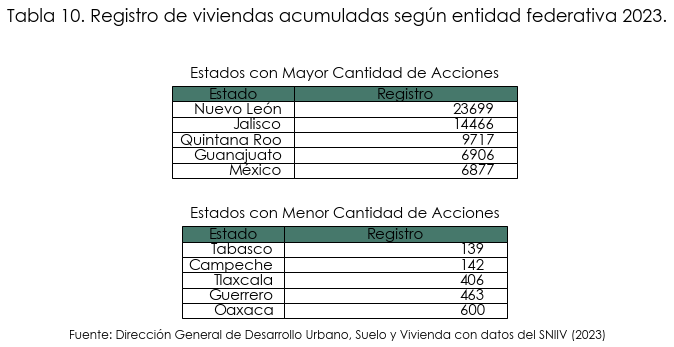

In [349]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Fuente de los textos
fuente = "Century Gothic"

# Crear la figura y los ejes con un tamaño más grande
fig, axs = plt.subplots(2, 1, figsize=(8, 3.5))  # Aumenta el tamaño de la figura

# Títulos de las tablas
titulo_general = "Tabla 10. Registro de viviendas acumuladas según entidad federativa 2023."
titulo_tabla_mas_acciones = "Estados con Mayor Cantidad de Acciones"
titulo_tabla_menos_acciones = "Estados con Menor Cantidad de Acciones"

# Definir color de la tabla
colors = ['#235b4eff', '#D3EEE1']  # Gris claro a blanco
cm = LinearSegmentedColormap.from_list('custom', colors, N=6)

# Tabla para los 5 estados con la mayor cantidad de acciones
tabla_mas_inventario = axs[0].table(cellText=top_5_estados_mas_inventario.reset_index().values,
                                    colLabels=['Estado', 'Registro'],
                                    loc='center', colColours=[cm(0.30), cm(0.30)])


tabla_mas_inventario.auto_set_font_size(False)  # Desactiva el ajuste automático del tamaño de la fuente
tabla_mas_inventario.set_fontsize(15)  # Aumenta el tamaño de la fuente
tabla_mas_inventario.auto_set_column_width(col=list(range(len(top_5_estados_mas_inventario.columns))))
tabla_mas_inventario.scale(1, 2.2)  # Aumenta el tamaño de la tabla

# Agregar título sobre la tabla
axs[0].set_title(titulo_tabla_mas_acciones, fontsize=15, fontname=fuente, pad=30)  # Utiliza pad para ajustar la distancia entre el título y la tabla

# Tabla para los 5 estados con la menor cantidad de acciones
tabla_menos_inventario = axs[1].table(cellText=top_5_estados_menos_inventario.reset_index().values,
                                      colLabels=['Estado', 'Registro'],
                                      loc='center', colColours=[cm(0.30), cm(0.30)])


tabla_menos_inventario.auto_set_font_size(False)  # Desactiva el ajuste automático del tamaño de la fuente
tabla_menos_inventario.set_fontsize(15)  # Aumenta el tamaño de la fuente
tabla_menos_inventario.auto_set_column_width(col=list(range(len(top_5_estados_menos_inventario.columns))))
tabla_menos_inventario.scale(1, 2.2)  # Aumenta el tamaño de la tabla

# Agregar título sobre la tabla
axs[1].set_title(titulo_tabla_menos_acciones, fontsize=15, fontname=fuente, pad=30)  # Utiliza pad para ajustar la distancia entre el título y la tabla

# Ajustar el espacio entre los títulos de las tablas
plt.subplots_adjust(hspace=1.8)

# Agregar la fuente debajo de la segunda tabla
plt.text(0.5, -0.02, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)',
         horizontalalignment='center', verticalalignment='center', transform=fig.transFigure, fontsize=12, fontname=fuente)

# Ocultar los ejes
for ax in axs:
    ax.axis('off')

# Agregar título general
plt.suptitle(titulo_general, fontsize=18, fontname=fuente, y=1.28)  # Ajusta la posición vertical del título general

# Guardar la imagen
plt.savefig('top_5_estados_inventario.png', bbox_inches='tight')

# Mostrar la imagen
plt.show()

#### Inventario de Vivienda
- Tabla 11. Inventario de vivienda acumulado anual 2023 según entidad federativa


In [350]:
import pandas as pd
import requests

# Obtención de los datos
url_ruv12 = "https://sniiv.sedatu.gob.mx/api/CuboAPI/GetInventario/2023,1/00/0/estado"
r = requests.get(url_ruv12)

# Crear DataFrame a partir de los datos JSON
df_ruv12 = pd.DataFrame(r.json())

# Crear DataFrame con las columnas de los meses
df_meses = pd.DataFrame()

# Iterar sobre los meses para crear las columnas correspondientes y calcular el total
total_viviendas = 0
for mes in range(1, 13):
    # Obtener datos para el mes actual
    url_mes = f"https://sniiv.sedatu.gob.mx/api/CuboAPI/GetInventario/2023,{mes:02d}/00/0/estado"
    r_mes = requests.get(url_mes)
    data_mes = r_mes.json()
    
    # Crear DataFrame para el mes actual
    df_mes = pd.DataFrame(data_mes)
    if mes == 1:
        df_ruv12 = df_mes[['estado', 'viviendas']].rename(columns={'viviendas': f'viviendas_mes{mes}'})
    else:
        df_ruv12[f'viviendas_mes{mes}'] = df_mes['viviendas']
    total_viviendas += df_mes['viviendas']

# Agregar la columna 'Total' al DataFrame
df_ruv12['Total'] = total_viviendas
df_ruv12

,estado,viviendas_mes1,viviendas_mes2,viviendas_mes3,viviendas_mes4,viviendas_mes5,viviendas_mes6,viviendas_mes7,viviendas_mes8,viviendas_mes9,viviendas_mes10,viviendas_mes11,viviendas_mes12,Total
0,Aguascalientes,6932,6876,6793,6600,6451,6373,6624,6363,6052,6268,5846,5802,76980
1,Baja California,6568,6993,6975,7090,6913,7376,7766,7621,7633,7957,7834,7593,88319
2,Baja California Sur,1735,1942,1786,1718,1701,1778,1783,1698,1716,1667,1576,1516,20616
3,Campeche,190,159,145,149,132,160,156,152,149,153,149,148,1842
4,Coahuila de Zaragoza,8632,8444,8259,8178,8585,8637,8171,7498,7204,7247,7237,7332,95424
5,Colima,2907,2911,2706,2697,2667,2704,2705,2625,2565,2471,2478,2444,31880
6,Chiapas,1698,1640,1582,1559,1685,1680,1693,1658,1539,1500,1458,1468,19160
7,Chihuahua,6979,6920,6655,7011,7167,7191,6857,6004,6420,6017,6059,5777,79057
8,Ciudad de México,4548,4502,4521,4241,4715,4691,4980,5042,5081,4927,4957,4810,57015
9,Durango,3494,3798,3558,3601,3916,3832,3975,3653,3824,3854,3756,3646,44907


In [351]:
# Filtrar para mostrar solo la columna 'estado' y 'Total'
df_ruv12_filt = df_ruv12[['estado', 'Total']]
# Filtrar para mostrar solo la columna 'estado' y 'Total'
df_ruv12_filt = df_ruv12[['estado', 'Total']]

# Filtrar para mostrar solo la columna 'estado' y 'Total' y cambiar el nombre de la columna 'Total' a 'Inventario'
ruv_inv = df_ruv12[['estado', 'Total']].rename(columns={'Total': 'Inventario'})

In [352]:
# Filtrar para mostrar solo la columna 'Total'
ruv_reg = df_ruv12[['Total']]
# Cambiar el nombre de la columna 'Total' a 'Inventario'
ruv_reg = ruv_reg.rename(columns={'Total': 'Registro'})

In [353]:
# Unir los DataFrames por la columna 'estado'
ruv_vivi = pd.merge(ruv_inv, ruv_reg, on='estado')
ruv_vivi

KeyError: 'estado'

In [ ]:
# Obtener los 5 estados con el inventario más grande
top_5_inventario_mas_grande = ruv_vivi.nlargest(5, 'Inventario')
print("Top 5 estados con el inventario más grande:")
print(top_5_inventario_mas_grande)

# Obtener los 5 estados con el inventario más pequeño
top_5_inventario_mas_pequeño = ruv_vivi.nsmallest(5, 'Inventario')
print("\nTop 5 estados con el inventario más pequeño:")
print(top_5_inventario_mas_pequeño)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Datos de ejemplo
top_5_estados_mas_inventario = {
    'Estado': ['Nuevo León', 'Jalisco', 'México', 'Quintana Roo', 'Hidalgo'],
    'Registro': [23699, 14466, 6877, 9717, 5035]
}

top_5_estados_menos_inventario = {
    'Estado': ['Campeche', 'Oaxaca', 'Tabasco', 'Tlaxcala', 'Chiapas'],
    'Registro': [142, 600, 139, 406, 1089]
}

# Convertir los datos en DataFrames de pandas
df_mas_inventario = pd.DataFrame(top_5_estados_mas_inventario)
df_menos_inventario = pd.DataFrame(top_5_estados_menos_inventario)

# Fuente de los textos
fuente = "Century Gothic"

# Crear la figura y los ejes con un tamaño más grande
fig, axs = plt.subplots(2, 1, figsize=(2, 4))  # Aumenta el tamaño de la figura

# Títulos de las tablas
titulo_general = "Tabla 11. Inventario de vivienda acumulado mensual 2023 según entidad federativa."
titulo_tabla_mas_inventario = "Estados con Mayor Inventario de viviendas acumulado anual"
titulo_tabla_menos_inventario = "Estados con Menor Inventario de viviendas acumulado anual"

# Definir color de la tabla
colors = ['#235b4eff', '#D3EEE1']  # Gris claro a blanco
cm = LinearSegmentedColormap.from_list('custom', colors, N=6)

# Tabla para los 5 estados con mayor inventario
tabla_mas_inventario = axs[0].table(cellText=df_mas_inventario.values,
                                    colLabels=df_mas_inventario.columns,
                                    loc='center', colColours=[cm(0.30), cm(0.30)])

tabla_mas_inventario.auto_set_font_size(False)  # Desactiva el ajuste automático del tamaño de la fuente
tabla_mas_inventario.set_fontsize(15)  # Aumenta el tamaño de la fuente
tabla_mas_inventario.auto_set_column_width(col=list(range(len(df_mas_inventario.columns))))
tabla_mas_inventario.scale(1, 2.2)  # Aumenta el tamaño de la tabla

# Agregar título sobre la tabla
axs[0].set_title(titulo_tabla_mas_inventario, fontsize=15, fontname=fuente, pad=30)  # Utiliza pad para ajustar la distancia entre el título y la tabla

# Tabla para los 5 estados con menor inventario
tabla_menos_inventario = axs[1].table(cellText=df_menos_inventario.values,
                                      colLabels=df_menos_inventario.columns,
                                      loc='center', colColours=[cm(0.30), cm(0.30)])


tabla_menos_inventario.auto_set_font_size(False)  # Desactiva el ajuste automático del tamaño de la fuente
tabla_menos_inventario.set_fontsize(15)  # Aumenta el tamaño de la fuente
tabla_menos_inventario.auto_set_column_width(col=list(range(len(df_menos_inventario.columns))))
tabla_menos_inventario.scale(1, 2.2)  # Aumenta el tamaño de la tabla

# Agregar título sobre la tabla
axs[1].set_title(titulo_tabla_menos_inventario, fontsize=15, fontname=fuente, pad=30)  # Utiliza pad para ajustar la distancia entre el título y la tabla

# Ajustar el espacio entre los títulos de las tablas
plt.subplots_adjust(hspace=1.8)

# Agregar la fuente debajo de la segunda tabla
plt.text(0.5, -0.002, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)',
         horizontalalignment='center', verticalalignment='center', transform=fig.transFigure, fontsize=12, fontname=fuente)

# Ocultar los ejes
for ax in axs:
    ax.axis('off')

# Agregar título general
plt.suptitle(titulo_general, fontsize=18, fontname=fuente, y=1.1)  # Ajusta la posición vertical del título general

# Guardar la imagen
plt.savefig('top_5_estados_inventario.png', bbox_inches='tight')

# Mostrar la imagen
plt.show()


- Figura 7. Inventario de vivienda acumulado según entidad federativa, anual 2023.

In [354]:
ruv_inv

# Fusionar el DataFrame ruv_invigeo  con el GeoDataFrame del mapa de estados
ruv_invigeo = estados.merge(ruv_inv, how='inner', left_on='state_name', right_on='estado')

In [355]:
ruv_invigeo

,id,state_code,state_name,geometry,estado,Inventario
0,None,9,Ciudad de México,"POLYGON ((-99.09052 19.50926, -99.06421 19.498...",Ciudad de México,57015
1,None,12,Guerrero,"POLYGON ((-100.53878 18.84399, -100.50201 18.8...",Guerrero,27297
2,None,15,México,"POLYGON ((-99.85919 20.26838, -99.85950 20.264...",México,188235
3,None,17,Morelos,"POLYGON ((-99.06199 19.04877, -99.02935 19.085...",Morelos,45241
4,None,25,Sinaloa,"POLYGON ((-108.47046 27.03457, -108.42165 27.0...",Sinaloa,74619
5,None,2,Baja California,"MULTIPOLYGON (((-115.21380 28.37512, -115.1675...",Baja California,88319
6,None,26,Sonora,"MULTIPOLYGON (((-112.55438 28.73103, -112.5553...",Sonora,77514
7,None,3,Baja California Sur,"MULTIPOLYGON (((-109.80049 24.15197, -109.8020...",Baja California Sur,20616
8,None,32,Zacatecas,"POLYGON ((-101.60033 24.75414, -101.59780 24.7...",Zacatecas,25343
9,None,10,Durango,"POLYGON ((-105.93181 26.76559, -105.89409 26.7...",Durango,44907


In [356]:
max_inventario = ruv_invigeo['Inventario'].max()
print("El valor más grande de inventario es:", max_inventario)


El valor más grande de inventario es: 339475


In [357]:
min_inventario = ruv_invigeo['Inventario'].min()
print("El valor más pequeño de inventario es:", min_inventario)


El valor más pequeño de inventario es: 1842


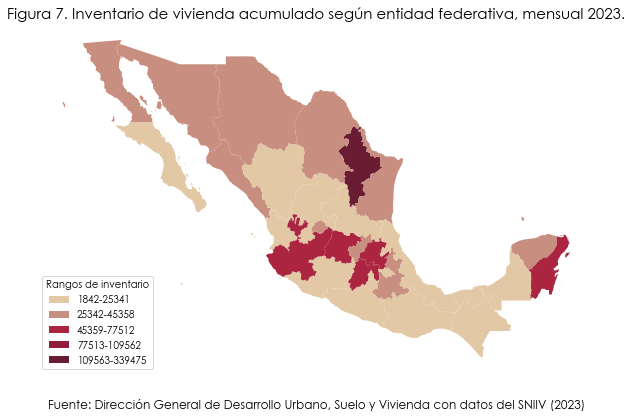

In [359]:
# Definir los límites de los rangos de inventario
limites_rangos = [1842, 25342, 45359, 77513, 109563, 339475]

# Definir los colores para cada rango
paleta = ["#e3c8a6ff", "#c88f80ff", "#ac2540ff", "#901d3dff", "#691c32ff"]
niveles = ["1842-25341", "25342-45358", "45359-77512", "77513-109562", "109563-339475", "339476"]

# Convertir lista de colores a un objeto de paleta de colores
cmap_paleta = ListedColormap(paleta)

# Crear leyenda personalizada
legend_elements = [Patch(facecolor=color, label=label) for color, label in zip(paleta, niveles)]

# Visualizar el mapa de inventario por estado
fig, ax = plt.subplots(figsize=(10, 10))
ruv_invigeo.plot(ax=ax, column='Inventario', cmap=cmap_paleta, linewidth=0.0, edgecolor='None', legend=False)
plt.title('Figura 7. Inventario de vivienda acumulado según entidad federativa, mensual 2023.', fontdict={'fontsize': 15})
plt.text(0.5, -0.1, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)', ha='center', transform=ax.transAxes, fontsize=12)
plt.axis('off')  # Quitar el marco del mapa
plt.legend(handles=legend_elements, title='Rangos de inventario', loc='lower left', fontsize=10)  # Ubicar la leyenda en el lado izquierdo
plt.show()